In [112]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Import and Cleaning World Mining, Refinery Production, and Reserve Data

In [130]:
#import world mining data, data is dowsnloaded from: https://www.sciencebase.gov/catalog/item/6798fd34d34ea8c18376e8ee

df_minerals= pd.read_csv(r"C:\Users\Tisi\OneDrive\Desktop\Data_analytics\Minerals analysis\MCS2025_World_Data.csv") 

In [3]:
df_minerals.head()

,SOURCE,COMMODITY,COUNTRY,TYPE,UNIT_MEAS,PROD_2023,PROD_EST_ 2024,PROD_NOTES,CAP_2023,CAP_EST_ 2024,CAP_NOTES,RESERVES_2024,RESERVE_NOTES
0,MCS2025,Abrasives,United States,"Plant capacity, fused aluminum oxide",metric tons,NaN,NaN,estimated for 2023,NaN,NaN,NaN,NaN,NaN
1,MCS2025,Abrasives,United States and Canada,"Plant capacity, fused aluminum oxide",metric tons,NaN,NaN,,60000.0,60000.0,NaN,NaN,NaN
2,MCS2025,Abrasives,Australia,"Plant capacity, fused aluminum oxide",metric tons,NaN,NaN,NaN,50000.0,50000.0,NaN,NaN,NaN
3,MCS2025,Abrasives,Austria,"Plant capacity, fused aluminum oxide",metric tons,NaN,NaN,NaN,90000.0,90000.0,NaN,NaN,NaN
4,MCS2025,Abrasives,Brazil,"Plant capacity, fused aluminum oxide",metric tons,NaN,NaN,NaN,50000.0,50000.0,NaN,NaN,NaN


In [4]:
#cleaning column names
df_minerals.columns=df_minerals.columns.str.strip() # Remove leading/trailing spaces
df_minerals.columns = df_minerals.columns.str.replace(" ", "_")  # Replace spaces with underscores
df_minerals.columns = df_minerals.columns.str.replace("-", "_")  # Replace dashes with underscores
df_minerals.columns = df_minerals.columns.str.replace("__", "_")  # Fix double underscores
df_minerals.columns  = df_minerals.columns.str.lower() # Convert to lowercase
df_minerals.head()

,source,commodity,country,type,unit_meas,prod_2023,prod_est_2024,prod_notes,cap_2023,cap_est_2024,cap_notes,reserves_2024,reserve_notes
0,MCS2025,Abrasives,United States,"Plant capacity, fused aluminum oxide",metric tons,NaN,NaN,estimated for 2023,NaN,NaN,NaN,NaN,NaN
1,MCS2025,Abrasives,United States and Canada,"Plant capacity, fused aluminum oxide",metric tons,NaN,NaN,,60000.0,60000.0,NaN,NaN,NaN
2,MCS2025,Abrasives,Australia,"Plant capacity, fused aluminum oxide",metric tons,NaN,NaN,NaN,50000.0,50000.0,NaN,NaN,NaN
3,MCS2025,Abrasives,Austria,"Plant capacity, fused aluminum oxide",metric tons,NaN,NaN,NaN,90000.0,90000.0,NaN,NaN,NaN
4,MCS2025,Abrasives,Brazil,"Plant capacity, fused aluminum oxide",metric tons,NaN,NaN,NaN,50000.0,50000.0,NaN,NaN,NaN


In [5]:
# Transform data from wide to long format
df_minerals_long = df_minerals.melt(
    id_vars=["source", "commodity", "country", "type", "unit_meas"],  # Keep these columns fixed
    value_vars=["prod_2023", "prod_est_2024", "cap_2023", "cap_est_2024", "reserves_2024"],  # Columns to reshape
    var_name="metric_year",  # New column for former column names
    value_name="value"  # New column for values
)

print(df_minerals_long.head())

    source  commodity                   country  \
0  MCS2025  Abrasives             United States   
1  MCS2025  Abrasives  United States and Canada   
2  MCS2025  Abrasives                 Australia   
3  MCS2025  Abrasives                   Austria   
4  MCS2025  Abrasives                    Brazil   

                                   type    unit_meas metric_year value  
0  Plant capacity, fused aluminum oxide  metric tons   prod_2023   NaN  
1  Plant capacity, fused aluminum oxide  metric tons   prod_2023   NaN  
2  Plant capacity, fused aluminum oxide  metric tons   prod_2023   NaN  
3  Plant capacity, fused aluminum oxide  metric tons   prod_2023   NaN  
4  Plant capacity, fused aluminum oxide  metric tons   prod_2023   NaN  


In [6]:
df_minerals_long.head(5)

,source,commodity,country,type,unit_meas,metric_year,value
0,MCS2025,Abrasives,United States,"Plant capacity, fused aluminum oxide",metric tons,prod_2023,NaN
1,MCS2025,Abrasives,United States and Canada,"Plant capacity, fused aluminum oxide",metric tons,prod_2023,NaN
2,MCS2025,Abrasives,Australia,"Plant capacity, fused aluminum oxide",metric tons,prod_2023,NaN
3,MCS2025,Abrasives,Austria,"Plant capacity, fused aluminum oxide",metric tons,prod_2023,NaN
4,MCS2025,Abrasives,Brazil,"Plant capacity, fused aluminum oxide",metric tons,prod_2023,NaN


In [7]:
#More data cleaning
df_minerals_long["commodity"] = (
    df_minerals_long["commodity"]
    .astype(str)        # Ensure all values are strings
    .str.strip()        # Remove leading and trailing spaces
    .str.lower()        # Convert to lowercase
    .str.replace(r"\s+", " ", regex=True)  # Replace multiple spaces with a single space
)

In [8]:
df_minerals_long.head(5)

,source,commodity,country,type,unit_meas,metric_year,value
0,MCS2025,abrasives,United States,"Plant capacity, fused aluminum oxide",metric tons,prod_2023,NaN
1,MCS2025,abrasives,United States and Canada,"Plant capacity, fused aluminum oxide",metric tons,prod_2023,NaN
2,MCS2025,abrasives,Australia,"Plant capacity, fused aluminum oxide",metric tons,prod_2023,NaN
3,MCS2025,abrasives,Austria,"Plant capacity, fused aluminum oxide",metric tons,prod_2023,NaN
4,MCS2025,abrasives,Brazil,"Plant capacity, fused aluminum oxide",metric tons,prod_2023,NaN


In [9]:
df_minerals_long[df_minerals_long["commodity"] == "copper"]  #check copper data

,source,commodity,country,type,unit_meas,metric_year,value
277,MCS2025,copper,United States,"Mine production, recoverable copper content",thousand metric tons,prod_2023,1130.0
278,MCS2025,copper,Australia,"Mine production, recoverable copper content",thousand metric tons,prod_2023,778.0
279,MCS2025,copper,Canada,"Mine production, recoverable copper content",thousand metric tons,prod_2023,500.0
280,MCS2025,copper,Chile,"Mine production, recoverable copper content",thousand metric tons,prod_2023,5250.0
281,MCS2025,copper,China,"Mine production, recoverable copper content",thousand metric tons,prod_2023,1820.0
...,...,...,...,...,...,...,...
5310,MCS2025,copper,Poland,"Refinery production, copper",thousand metric tons,reserves_2024,NaN
5311,MCS2025,copper,Russia,"Refinery production, copper",thousand metric tons,reserves_2024,NaN
5312,MCS2025,copper,Zambia,"Refinery production, copper",thousand metric tons,reserves_2024,NaN
5313,MCS2025,copper,Other Countries,"Refinery production, copper",thousand metric tons,reserves_2024,NaN


In [10]:
# Rename column 'value' to 'supply_cat_value'
df_minerals_long.rename(columns={'value': 'supply_cat_value'}, inplace=True)

# Print to confirm the change
print(df_minerals_long.head())  # Shows first few rows with updated column name

    source  commodity                   country  \
0  MCS2025  abrasives             United States   
1  MCS2025  abrasives  United States and Canada   
2  MCS2025  abrasives                 Australia   
3  MCS2025  abrasives                   Austria   
4  MCS2025  abrasives                    Brazil   

                                   type    unit_meas metric_year  \
0  Plant capacity, fused aluminum oxide  metric tons   prod_2023   
1  Plant capacity, fused aluminum oxide  metric tons   prod_2023   
2  Plant capacity, fused aluminum oxide  metric tons   prod_2023   
3  Plant capacity, fused aluminum oxide  metric tons   prod_2023   
4  Plant capacity, fused aluminum oxide  metric tons   prod_2023   

  supply_cat_value  
0              NaN  
1              NaN  
2              NaN  
3              NaN  
4              NaN  


In [11]:
print(df_minerals_long["metric_year"].unique())

['prod_2023' 'prod_est_2024' 'cap_2023' 'cap_est_2024' 'reserves_2024']


In [12]:
# Define mapping logic for supply categories
def assign_supply_metrics(metric):
    if metric in ["prod_2023", "prod_est_2024"]:
        return "Annual Production"
    elif metric in ["cap_2023", "cap_est_2024"]:
        return "Annual Capacity"
    elif metric == "reserves_2024":
        return "Country Reserves"
    else:
        return "Unknown"  # Fallback for unexpected values

# Apply function to create new column
df_minerals_long["supply_metrics"] = df_minerals_long["metric_year"].apply(assign_supply_metrics)

# Display result
print(df_minerals_long[["metric_year", "supply_metrics"]].drop_duplicates())  # To check unique mappings

        metric_year     supply_metrics
0         prod_2023  Annual Production
1250  prod_est_2024  Annual Production
2500       cap_2023    Annual Capacity
3750   cap_est_2024    Annual Capacity
5000  reserves_2024   Country Reserves


In [13]:
print(df_minerals_long["country"].unique())

['United States' 'United\xa0States and Canada' 'Australia' 'Austria'
 'Brazil' 'China' 'France' 'Germany' 'India' 'Japan' 'Mexico' 'Norway'
 'Venezuela' 'Other Countries' 'World total (rounded)' 'Bahrain' 'Canada '
 'Iceland' 'Malaysia' 'Russia ' 'United Arab Emirates' 'Bolivia' 'Burma'
 'Guatemala' 'Iran' 'Kazakhstan' 'Kyrgyzstan' 'Laos' 'Pakistan'
 'Tajikistan' 'Turkey' 'Vietnam' 'World total (rounded) 10' 'Belgium'
 'Morocco' 'Peru' 'Greece' 'Guinea' 'Indonesia' 'Ireland' 'Jamaica'
 'Saudi Arabia' 'Spain' 'Madagascar' 'Mozambique' 'Rwanda' 'Uganda'
 'Bulgaria' 'Korea, Republic of' 'Argentina' 'Chile' 'Russia'
 'World total' 'Israel' 'Jordan' 'Ukraine' 'Netherlands' 'Poland'
 'Uzbekistan' 'United States (includes Puerto Rico)' 'Egypt'
 'Other countries (rounded)' 'Finland' 'South Africa ' 'Zimbabwe'
 'Brazil (beneficiated)' 'Czechia' 'Denmark ' 'Senegal' 'Congo (Kinshasa)'
 'Cuba' 'New Caledonia' 'Papua New Guinea' 'Philippines' 'Zambia' 'Angola'
 'Botswana' 'Denmark (processed)' 'Br

In [14]:
#More data cleaning
#Drop country rows that contain "World"
df_minerals_long = df_minerals_long[~df_minerals_long["country"].str.contains("World", case=False, na=False)]
print(df_minerals_long["country"].unique())

['United States' 'United\xa0States and Canada' 'Australia' 'Austria'
 'Brazil' 'China' 'France' 'Germany' 'India' 'Japan' 'Mexico' 'Norway'
 'Venezuela' 'Other Countries' 'Bahrain' 'Canada ' 'Iceland' 'Malaysia'
 'Russia ' 'United Arab Emirates' 'Bolivia' 'Burma' 'Guatemala' 'Iran'
 'Kazakhstan' 'Kyrgyzstan' 'Laos' 'Pakistan' 'Tajikistan' 'Turkey'
 'Vietnam' 'Belgium' 'Morocco' 'Peru' 'Greece' 'Guinea' 'Indonesia'
 'Ireland' 'Jamaica' 'Saudi Arabia' 'Spain' 'Madagascar' 'Mozambique'
 'Rwanda' 'Uganda' 'Bulgaria' 'Korea, Republic of' 'Argentina' 'Chile'
 'Russia' 'Israel' 'Jordan' 'Ukraine' 'Netherlands' 'Poland' 'Uzbekistan'
 'United States (includes Puerto Rico)' 'Egypt'
 'Other countries (rounded)' 'Finland' 'South Africa ' 'Zimbabwe'
 'Brazil (beneficiated)' 'Czechia' 'Denmark ' 'Senegal' 'Congo (Kinshasa)'
 'Cuba' 'New Caledonia' 'Papua New Guinea' 'Philippines' 'Zambia' 'Angola'
 'Botswana' 'Denmark (processed)' 'Brazil (beneficiated, marketable)'
 'Italy' 'Spain (includes pegmati

In [15]:
#More data cleaning 
# Remove text inside parentheses or brackets
df_minerals_long["country"] = df_minerals_long["country"].str.replace(r"\s*\(.*?\)", "", regex=True)

# Display unique cleaned country names
print(df_minerals_long["country"].unique())

['United States' 'United\xa0States and Canada' 'Australia' 'Austria'
 'Brazil' 'China' 'France' 'Germany' 'India' 'Japan' 'Mexico' 'Norway'
 'Venezuela' 'Other Countries' 'Bahrain' 'Canada ' 'Iceland' 'Malaysia'
 'Russia ' 'United Arab Emirates' 'Bolivia' 'Burma' 'Guatemala' 'Iran'
 'Kazakhstan' 'Kyrgyzstan' 'Laos' 'Pakistan' 'Tajikistan' 'Turkey'
 'Vietnam' 'Belgium' 'Morocco' 'Peru' 'Greece' 'Guinea' 'Indonesia'
 'Ireland' 'Jamaica' 'Saudi Arabia' 'Spain' 'Madagascar' 'Mozambique'
 'Rwanda' 'Uganda' 'Bulgaria' 'Korea, Republic of' 'Argentina' 'Chile'
 'Russia' 'Israel' 'Jordan' 'Ukraine' 'Netherlands' 'Poland' 'Uzbekistan'
 'Egypt' 'Other countries' 'Finland' 'South Africa ' 'Zimbabwe' 'Czechia'
 'Denmark ' 'Senegal' 'Congo' 'Cuba' 'New Caledonia' 'Papua New Guinea'
 'Philippines' 'Zambia' 'Angola' 'Botswana' 'Denmark' 'Italy' 'Thailand'
 'Mongolia' 'Ghana' 'Lesotho' 'Namibia' 'Sierra Leone' 'Tanzania'
 'Burkina Faso' 'Colombia' 'Mali' 'Korea, North' 'Sri Lanka' 'Algeria'
 'Oman' 'Qa

In [16]:
#More data cleaning
df_minerals_long["country"] = (
    df_minerals_long["country"]
    .str.replace("\xa0", " ")  # Remove non-breaking spaces
    .str.strip()               # Trim spaces
    .str.replace(r"\s+", " ", regex=True)  # Fix multiple spaces
    .str.title()               # Standardize capitalization
)

# Fix specific country names
df_minerals_long["country"] = df_minerals_long["country"].replace({
    "Korea, Republic Of": "South Korea",
    "Korea, North": "North Korea"
})

print(df_minerals_long["country"].unique())

['United States' 'United States And Canada' 'Australia' 'Austria' 'Brazil'
 'China' 'France' 'Germany' 'India' 'Japan' 'Mexico' 'Norway' 'Venezuela'
 'Other Countries' 'Bahrain' 'Canada' 'Iceland' 'Malaysia' 'Russia'
 'United Arab Emirates' 'Bolivia' 'Burma' 'Guatemala' 'Iran' 'Kazakhstan'
 'Kyrgyzstan' 'Laos' 'Pakistan' 'Tajikistan' 'Turkey' 'Vietnam' 'Belgium'
 'Morocco' 'Peru' 'Greece' 'Guinea' 'Indonesia' 'Ireland' 'Jamaica'
 'Saudi Arabia' 'Spain' 'Madagascar' 'Mozambique' 'Rwanda' 'Uganda'
 'Bulgaria' 'South Korea' 'Argentina' 'Chile' 'Israel' 'Jordan' 'Ukraine'
 'Netherlands' 'Poland' 'Uzbekistan' 'Egypt' 'Finland' 'South Africa'
 'Zimbabwe' 'Czechia' 'Denmark' 'Senegal' 'Congo' 'Cuba' 'New Caledonia'
 'Papua New Guinea' 'Philippines' 'Zambia' 'Angola' 'Botswana' 'Italy'
 'Thailand' 'Mongolia' 'Ghana' 'Lesotho' 'Namibia' 'Sierra Leone'
 'Tanzania' 'Burkina Faso' 'Colombia' 'Mali' 'North Korea' 'Sri Lanka'
 'Algeria' 'Oman' 'Qatar' 'Azerbaijan' 'Turkmenistan' 'Taiwan'
 'Mauritani

In [17]:
#More data cleaning
# Extract year from 'metric_year' column
df_minerals_long["year"] = df_minerals_long["metric_year"].str.extract(r'(\d{4})')

# Convert to integer for consistency
df_minerals_long["year"] = df_minerals_long["year"].astype(int)

# Display result
print(df_minerals_long[["metric_year", "year"]].drop_duplicates())  # Verify mappings

        metric_year  year
0         prod_2023  2023
1250  prod_est_2024  2024
2500       cap_2023  2023
3750   cap_est_2024  2024
5000  reserves_2024  2024


In [18]:
# Drop the 'metric_year' column
df_minerals_long = df_minerals_long.drop(columns=["metric_year"])

# Display the first few rows to verify
print(df_minerals_long.head())

    source  commodity                   country  \
0  MCS2025  abrasives             United States   
1  MCS2025  abrasives  United States And Canada   
2  MCS2025  abrasives                 Australia   
3  MCS2025  abrasives                   Austria   
4  MCS2025  abrasives                    Brazil   

                                   type    unit_meas supply_cat_value  \
0  Plant capacity, fused aluminum oxide  metric tons              NaN   
1  Plant capacity, fused aluminum oxide  metric tons              NaN   
2  Plant capacity, fused aluminum oxide  metric tons              NaN   
3  Plant capacity, fused aluminum oxide  metric tons              NaN   
4  Plant capacity, fused aluminum oxide  metric tons              NaN   

      supply_metrics  year  
0  Annual Production  2023  
1  Annual Production  2023  
2  Annual Production  2023  
3  Annual Production  2023  
4  Annual Production  2023  


In [19]:
#Make sure the value are store as integers
# Convert 'value' and 'year' columns in df_minerals_long
df_minerals_long["supply_cat_value"] = pd.to_numeric(df_minerals_long["supply_cat_value"], errors="coerce").astype("Int64")
df_minerals_long["year"] = pd.to_numeric(df_minerals_long["year"], errors="coerce").astype("Int64")

df_minerals_long.head()

,source,commodity,country,type,unit_meas,supply_cat_value,supply_metrics,year
0,MCS2025,abrasives,United States,"Plant capacity, fused aluminum oxide",metric tons,<NA>,Annual Production,2023
1,MCS2025,abrasives,United States And Canada,"Plant capacity, fused aluminum oxide",metric tons,<NA>,Annual Production,2023
2,MCS2025,abrasives,Australia,"Plant capacity, fused aluminum oxide",metric tons,<NA>,Annual Production,2023
3,MCS2025,abrasives,Austria,"Plant capacity, fused aluminum oxide",metric tons,<NA>,Annual Production,2023
4,MCS2025,abrasives,Brazil,"Plant capacity, fused aluminum oxide",metric tons,<NA>,Annual Production,2023


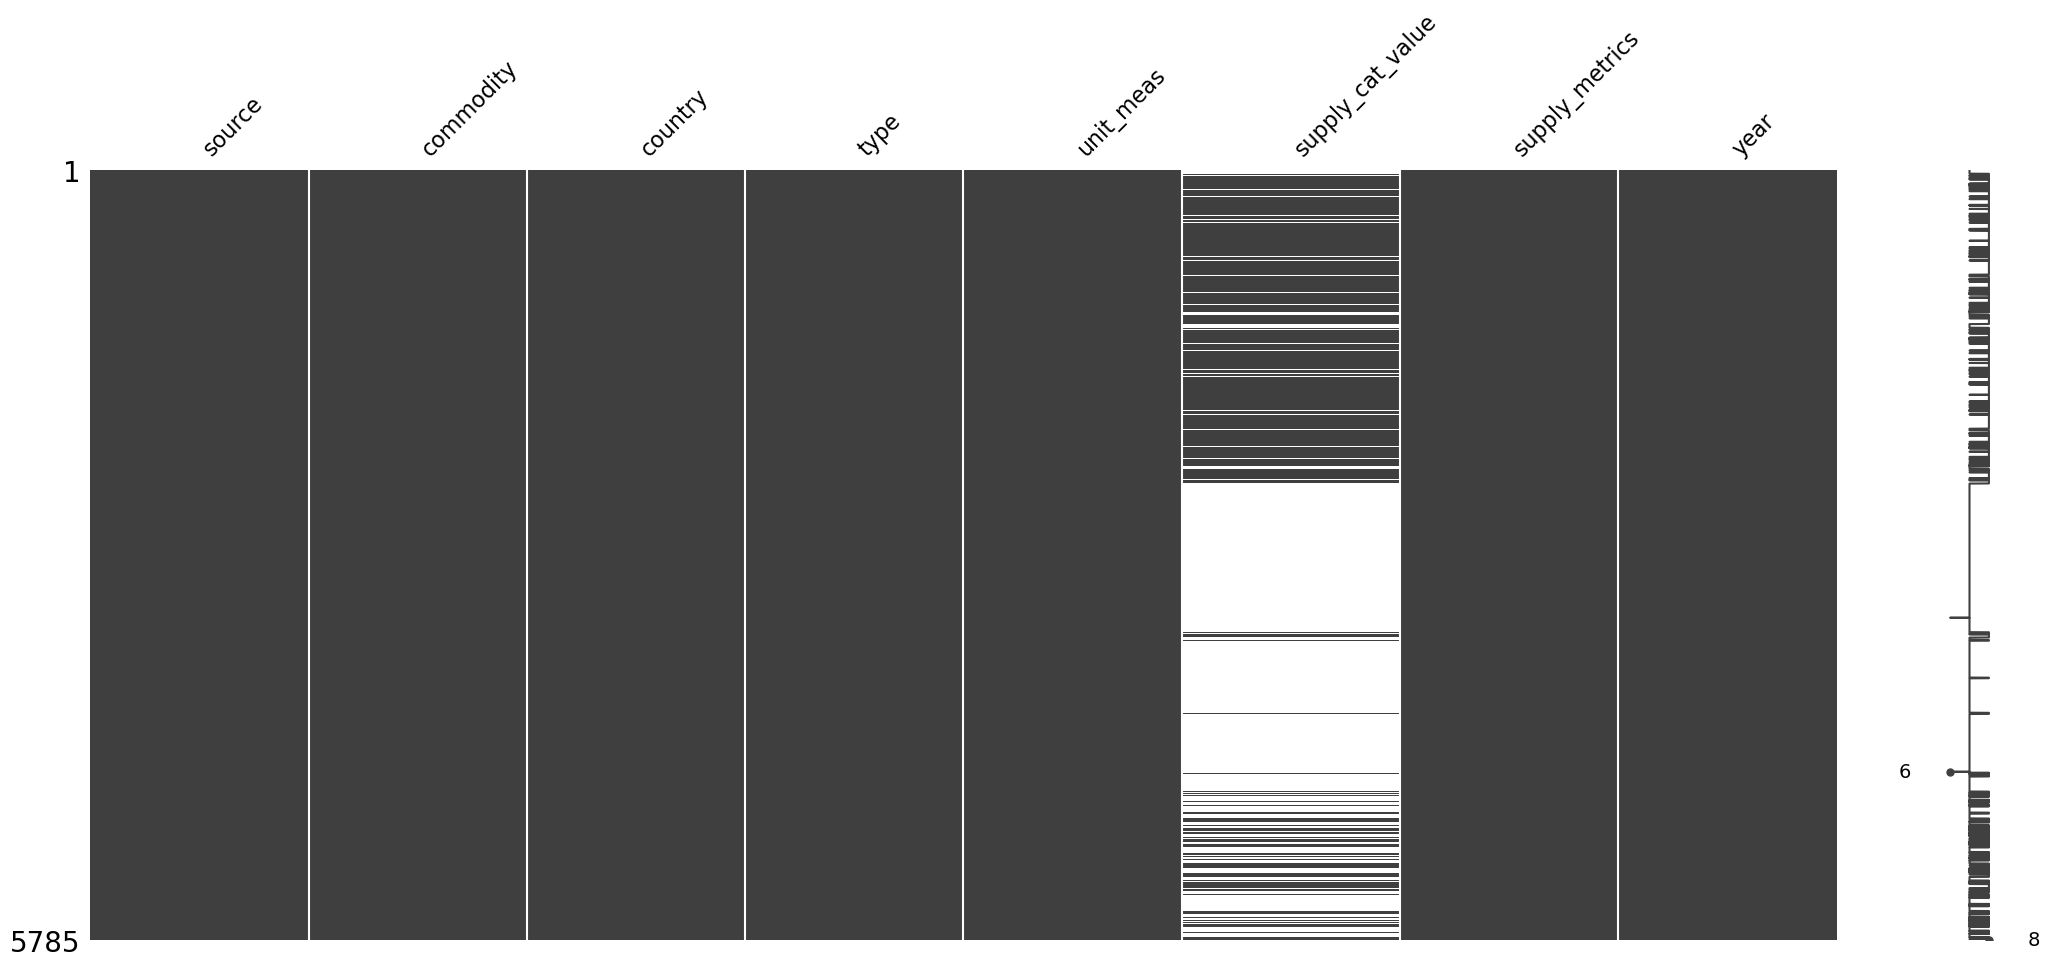

In [20]:
#check missing values
import missingno as msno

# Visualize missing values
msno.matrix(df_minerals_long)
plt.show()

In [21]:
df_minerals_clean = df_minerals_long #rename the dataframe

# Focus on Copper Production Data

In [22]:
# Create a new DataFrame with only Copper-related data
df_cu = df_minerals_long[df_minerals_long["commodity"].str.lower() == "copper"]

# Display first few rows to verify
df_cu.head(2)

,source,commodity,country,type,unit_meas,supply_cat_value,supply_metrics,year
277,MCS2025,copper,United States,"Mine production, recoverable copper content",thousand metric tons,1130,Annual Production,2023
278,MCS2025,copper,Australia,"Mine production, recoverable copper content",thousand metric tons,778,Annual Production,2023


In [23]:
print(df_cu.columns)

Index(['source', 'commodity', 'country', 'type', 'unit_meas',
       'supply_cat_value', 'supply_metrics', 'year'],
      dtype='object')


In [24]:
print(df_cu['supply_metrics'].unique())

['Annual Production' 'Annual Capacity' 'Country Reserves']


In [25]:
# Print rows where any value is missing
missing_rows = df_cu[df_cu.isna().any(axis=1)]
missing_rows

,source,commodity,country,type,unit_meas,supply_cat_value,supply_metrics,year
283,MCS2025,copper,Germany,"Mine production, recoverable copper content",thousand metric tons,<NA>,Annual Production,2023
286,MCS2025,copper,Japan,"Mine production, recoverable copper content",thousand metric tons,<NA>,Annual Production,2023
288,MCS2025,copper,South Korea,"Mine production, recoverable copper content",thousand metric tons,<NA>,Annual Production,2023
1533,MCS2025,copper,Germany,"Mine production, recoverable copper content",thousand metric tons,<NA>,Annual Production,2024
1536,MCS2025,copper,Japan,"Mine production, recoverable copper content",thousand metric tons,<NA>,Annual Production,2024
...,...,...,...,...,...,...,...,...
5309,MCS2025,copper,Peru,"Refinery production, copper",thousand metric tons,<NA>,Country Reserves,2024
5310,MCS2025,copper,Poland,"Refinery production, copper",thousand metric tons,<NA>,Country Reserves,2024
5311,MCS2025,copper,Russia,"Refinery production, copper",thousand metric tons,<NA>,Country Reserves,2024
5312,MCS2025,copper,Zambia,"Refinery production, copper",thousand metric tons,<NA>,Country Reserves,2024


In [26]:
# Rename entry in column type
df_cu = df_cu.copy()  # Ensure df_cu is not a slice of another DataFrame

df_cu.loc[:, "type"] = df_cu["type"].replace({
    "Mine production, recoverable copper content": "Mine",
    "Refinery production, copper": "Refinery"
})

df_cu = df_cu.rename(columns={"type": "production_type"})

df_cu #confirm rename

,source,commodity,country,production_type,unit_meas,supply_cat_value,supply_metrics,year
277,MCS2025,copper,United States,Mine,thousand metric tons,1130,Annual Production,2023
278,MCS2025,copper,Australia,Mine,thousand metric tons,778,Annual Production,2023
279,MCS2025,copper,Canada,Mine,thousand metric tons,500,Annual Production,2023
280,MCS2025,copper,Chile,Mine,thousand metric tons,5250,Annual Production,2023
281,MCS2025,copper,China,Mine,thousand metric tons,1820,Annual Production,2023
...,...,...,...,...,...,...,...,...
5309,MCS2025,copper,Peru,Refinery,thousand metric tons,<NA>,Country Reserves,2024
5310,MCS2025,copper,Poland,Refinery,thousand metric tons,<NA>,Country Reserves,2024
5311,MCS2025,copper,Russia,Refinery,thousand metric tons,<NA>,Country Reserves,2024
5312,MCS2025,copper,Zambia,Refinery,thousand metric tons,<NA>,Country Reserves,2024


In [27]:
# Filter rows where 'supply_metrics' is "Annual Production" and 'supply_cat_value' is missing
missing_supply_cat_value = df_cu[(df_cu['supply_metrics'] == "Annual Production") & (df_cu['supply_cat_value'].isna())]

# Print the rows with missing values
print(missing_supply_cat_value) #it seems Germany, Japan and S.Korea are missing production value, 
#there is no remedy for na,these rows will be dropped

       source commodity      country production_type             unit_meas  \
283   MCS2025    copper      Germany            Mine  thousand metric tons   
286   MCS2025    copper        Japan            Mine  thousand metric tons   
288   MCS2025    copper  South Korea            Mine  thousand metric tons   
1533  MCS2025    copper      Germany            Mine  thousand metric tons   
1536  MCS2025    copper        Japan            Mine  thousand metric tons   
1538  MCS2025    copper  South Korea            Mine  thousand metric tons   

      supply_cat_value     supply_metrics  year  
283               <NA>  Annual Production  2023  
286               <NA>  Annual Production  2023  
288               <NA>  Annual Production  2023  
1533              <NA>  Annual Production  2024  
1536              <NA>  Annual Production  2024  
1538              <NA>  Annual Production  2024  


In [28]:
# Filter rows where 'supply_metrics' is "Annual Capacity" and 'supply_cat_value' is missing
missing_supply_cat_value = df_cu[(df_cu['supply_metrics'] == "Annual Capacity") & (df_cu['supply_cat_value'].isna())]

# Print the rows with missing values
print(missing_supply_cat_value) #it seems there is no annual capacity for mines and refines, these will be dropped too. No recommended remedy

       source commodity          country production_type  \
2777  MCS2025    copper    United States            Mine   
2778  MCS2025    copper        Australia            Mine   
2779  MCS2025    copper           Canada            Mine   
2780  MCS2025    copper            Chile            Mine   
2781  MCS2025    copper            China            Mine   
...       ...       ...              ...             ...   
4059  MCS2025    copper             Peru        Refinery   
4060  MCS2025    copper           Poland        Refinery   
4061  MCS2025    copper           Russia        Refinery   
4062  MCS2025    copper           Zambia        Refinery   
4063  MCS2025    copper  Other Countries        Refinery   

                 unit_meas  supply_cat_value   supply_metrics  year  
2777  thousand metric tons              <NA>  Annual Capacity  2023  
2778  thousand metric tons              <NA>  Annual Capacity  2023  
2779  thousand metric tons              <NA>  Annual Capacity  2023  

In [29]:
# Filter rows where 'supply_metrics' is "Country Reserves" and 'supply_cat_value' is missing
missing_supply_cat_value = df_cu[(df_cu['supply_metrics'] == "Country Reserves") & (df_cu['supply_cat_value'].isna())]

# Print the rows with missing values
print(missing_supply_cat_value) #Already established Germany, Japan, and S.Korea are even missing mining production data
#country reserves are only applicable to mine production not refinery --- this maybe a result of data transformation so these data will be dropped

       source commodity          country production_type  \
5283  MCS2025    copper          Germany            Mine   
5286  MCS2025    copper            Japan            Mine   
5288  MCS2025    copper      South Korea            Mine   
5296  MCS2025    copper    United States        Refinery   
5297  MCS2025    copper        Australia        Refinery   
5298  MCS2025    copper           Canada        Refinery   
5299  MCS2025    copper            Chile        Refinery   
5300  MCS2025    copper            China        Refinery   
5301  MCS2025    copper            Congo        Refinery   
5302  MCS2025    copper          Germany        Refinery   
5303  MCS2025    copper            India        Refinery   
5304  MCS2025    copper        Indonesia        Refinery   
5305  MCS2025    copper            Japan        Refinery   
5306  MCS2025    copper       Kazakhstan        Refinery   
5307  MCS2025    copper      South Korea        Refinery   
5308  MCS2025    copper           Mexico

In [30]:
# Since already established why there are missing data and no remedy is recommended for these missing value, drop all rows with missing values
df_cu = df_cu.dropna()

# Reset index after dropping rows
df_cu.reset_index(drop=True, inplace=True)

# Print the updated DataFrame
print(df_cu)

     source commodity          country production_type             unit_meas  \
0   MCS2025    copper    United States            Mine  thousand metric tons   
1   MCS2025    copper        Australia            Mine  thousand metric tons   
2   MCS2025    copper           Canada            Mine  thousand metric tons   
3   MCS2025    copper            Chile            Mine  thousand metric tons   
4   MCS2025    copper            China            Mine  thousand metric tons   
..      ...       ...              ...             ...                   ...   
76  MCS2025    copper             Peru            Mine  thousand metric tons   
77  MCS2025    copper           Poland            Mine  thousand metric tons   
78  MCS2025    copper           Russia            Mine  thousand metric tons   
79  MCS2025    copper           Zambia            Mine  thousand metric tons   
80  MCS2025    copper  Other Countries            Mine  thousand metric tons   

    supply_cat_value     supply_metrics

In [31]:
#save data

# Define the correct save path
save_path = r"C:\Users\Tisi\OneDrive\Desktop\Data_analytics\Minerals analysis" #enter your desired location

# Export df_minerals_long to CSV
df_minerals_clean.to_csv(f"{save_path}\\df_minerals_clean.csv", index=False)

# Export df_cu to CSV
df_cu_clean = df_cu
df_cu_clean.to_csv(f"{save_path}\\df_cu_clean.csv", index=False)

# Import and Cleaning Copper Trade Data

In [129]:
#Import copper trade data; data is downloaded from:  https://comtradeplus.un.org/TradeFlow
#Based on HS code description: https://www.census.gov/foreign-trade/schedules/b/2025/index.html
df_trade_cu = pd.read_csv(
    r"C:\Users\Tisi\OneDrive\Desktop\Data_analytics\Minerals analysis\TradeData_3_23_2025_14_59_54_cu_x_m.csv",
    encoding="ISO-8859-1"
)

df_trade_cu

,typeCode,freqCode,refPeriodId,refYear,refMonth,period,reporterCode,reporterISO,reporterDesc,flowCode,...,netWgt,isNetWgtEstimated,grossWgt,isGrossWgtEstimated,cifvalue,fobvalue,primaryValue,legacyEstimationFlag,isReported,isAggregate
0,C,A,20240101,2024,52,2024,31,AZE,Azerbaijan,M,...,7.900000e+00,False,0.000,False,2.959000e+02,NaN,2.959000e+02,0,False,True
1,C,A,20240101,2024,52,2024,31,AZE,Azerbaijan,X,...,1.220565e+06,False,0.000,False,NaN,2.090464e+06,2.090464e+06,0,False,True
2,C,A,20240101,2024,52,2024,36,AUS,Australia,M,...,NaN,False,58.371,False,1.676914e+05,1.577572e+05,1.676914e+05,0,False,True
3,C,A,20240101,2024,52,2024,36,AUS,Australia,X,...,1.270480e+09,False,1276328.780,False,NaN,4.167720e+09,4.167720e+09,0,False,True
4,C,A,20240101,2024,52,2024,51,ARM,Armenia,M,...,3.000000e+00,False,0.000,False,2.400000e+00,NaN,2.400000e+00,0,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
233,C,A,20240101,2024,52,2024,826,GBR,United Kingdom,X,...,NaN,False,0.000,False,NaN,5.220735e+06,5.220735e+06,0,False,True
234,C,A,20240101,2024,52,2024,842,USA,USA,M,...,NaN,False,0.000,False,1.553819e+07,1.505177e+07,1.553819e+07,0,False,True
235,C,A,20240101,2024,52,2024,842,USA,USA,X,...,1.444907e+07,False,0.000,False,NaN,1.255048e+08,1.255048e+08,0,False,True
236,C,A,20240101,2024,52,2024,854,BFA,Burkina Faso,M,...,8.384000e+03,False,0.000,False,5.153813e+03,NaN,5.153813e+03,0,False,True


In [33]:
for col in df_trade_cu.columns:
    print(col)

typeCode
freqCode
refPeriodId
refYear
refMonth
period
reporterCode
reporterISO
reporterDesc
flowCode
flowDesc
partnerCode
partnerISO
partnerDesc
partner2Code
partner2ISO
partner2Desc
classificationCode
classificationSearchCode
isOriginalClassification
cmdCode
cmdDesc
aggrLevel
isLeaf
customsCode
customsDesc
mosCode
motCode
motDesc
qtyUnitCode
qtyUnitAbbr
qty
isQtyEstimated
altQtyUnitCode
altQtyUnitAbbr
altQty
isAltQtyEstimated
netWgt
isNetWgtEstimated
grossWgt
isGrossWgtEstimated
cifvalue
fobvalue
primaryValue
legacyEstimationFlag
isReported
isAggregate


In [34]:
#Drop unncessary columns and keep only main columns that will be used for analysis
# Define the columns to keep
columns_to_keep = [
   "refYear", "reporterDesc", "flowDesc", "partnerDesc", "cmdCode", "cmdDesc", 
    "cifvalue", "fobvalue", "primaryValue"
]

# Create a new DataFrame with only the selected columns
df_trade_cu_select = df_trade_cu[columns_to_keep]

# Display the first few rows to verify
df_trade_cu_select.head()

,refYear,reporterDesc,flowDesc,partnerDesc,cmdCode,cmdDesc,cifvalue,fobvalue,primaryValue
0,2024,Azerbaijan,Import,World,260300,Copper ores and concentrates,295.900,NaN,2.959000e+02
1,2024,Azerbaijan,Export,World,260300,Copper ores and concentrates,NaN,2.090464e+06,2.090464e+06
2,2024,Australia,Import,World,260300,Copper ores and concentrates,167691.412,1.577572e+05,1.676914e+05
3,2024,Australia,Export,World,260300,Copper ores and concentrates,NaN,4.167720e+09,4.167720e+09
4,2024,Armenia,Import,World,260300,Copper ores and concentrates,2.400,NaN,2.400000e+00


In [35]:
# Clean column names
df_trade_cu_select.columns = (
    df_trade_cu_select.columns.str.strip()  # Remove leading/trailing spaces
    .str.lower()  # Convert to lowercase
    .str.replace(" ", "_")  # Replace spaces with underscores
)

# Display cleaned column names
df_trade_cu_select.head()

,refyear,reporterdesc,flowdesc,partnerdesc,cmdcode,cmddesc,cifvalue,fobvalue,primaryvalue
0,2024,Azerbaijan,Import,World,260300,Copper ores and concentrates,295.900,NaN,2.959000e+02
1,2024,Azerbaijan,Export,World,260300,Copper ores and concentrates,NaN,2.090464e+06,2.090464e+06
2,2024,Australia,Import,World,260300,Copper ores and concentrates,167691.412,1.577572e+05,1.676914e+05
3,2024,Australia,Export,World,260300,Copper ores and concentrates,NaN,4.167720e+09,4.167720e+09
4,2024,Armenia,Import,World,260300,Copper ores and concentrates,2.400,NaN,2.400000e+00


In [36]:
# Define the renaming mapping
rename_mapping = {
    "refyear": "year",
    "reporterdesc": "country",
    "flowdesc": "trade_flow",
    "partnerdesc": "destination",
    "cmdcode": "hs_code",
    "cmddesc": "commodity",
    "cifvalue": "cif_value",
    "fobvalue": "fob_value",
    "primaryvalue": "primary_value"
}

# Rename the columns
df_trade_cu_select = df_trade_cu_select.rename(columns=rename_mapping)

# Display the first few rows to verify
df_trade_cu_select.head()

,year,country,trade_flow,destination,hs_code,commodity,cif_value,fob_value,primary_value
0,2024,Azerbaijan,Import,World,260300,Copper ores and concentrates,295.900,NaN,2.959000e+02
1,2024,Azerbaijan,Export,World,260300,Copper ores and concentrates,NaN,2.090464e+06,2.090464e+06
2,2024,Australia,Import,World,260300,Copper ores and concentrates,167691.412,1.577572e+05,1.676914e+05
3,2024,Australia,Export,World,260300,Copper ores and concentrates,NaN,4.167720e+09,4.167720e+09
4,2024,Armenia,Import,World,260300,Copper ores and concentrates,2.400,NaN,2.400000e+00


In [37]:
# Transform the DataFrame to long format
df_trade_cu_long = df_trade_cu_select.melt(
    id_vars=["year", "country", "trade_flow", "destination", "hs_code", "commodity"],  # Keep these columns fixed
    value_vars=["cif_value", "fob_value", "primary_value"],  # Columns to melt
    var_name="value_type",  # New column to store original column names
    value_name="trade_value"  # New column to store values
)

# Display the transformed DataFrame
df_trade_cu_long.head()

,year,country,trade_flow,destination,hs_code,commodity,value_type,trade_value
0,2024,Azerbaijan,Import,World,260300,Copper ores and concentrates,cif_value,295.900
1,2024,Azerbaijan,Export,World,260300,Copper ores and concentrates,cif_value,NaN
2,2024,Australia,Import,World,260300,Copper ores and concentrates,cif_value,167691.412
3,2024,Australia,Export,World,260300,Copper ores and concentrates,cif_value,NaN
4,2024,Armenia,Import,World,260300,Copper ores and concentrates,cif_value,2.400


In [38]:
# Add a new column 'unit' with value 'USD'
df_trade_cu_long["unit"] = "USD"

# Display the first few rows to verify
df_trade_cu_long.head()

,year,country,trade_flow,destination,hs_code,commodity,value_type,trade_value,unit
0,2024,Azerbaijan,Import,World,260300,Copper ores and concentrates,cif_value,295.900,USD
1,2024,Azerbaijan,Export,World,260300,Copper ores and concentrates,cif_value,NaN,USD
2,2024,Australia,Import,World,260300,Copper ores and concentrates,cif_value,167691.412,USD
3,2024,Australia,Export,World,260300,Copper ores and concentrates,cif_value,NaN,USD
4,2024,Armenia,Import,World,260300,Copper ores and concentrates,cif_value,2.400,USD


In [39]:
print(df_trade_cu_long["commodity"].unique())

['Copper ores and concentrates'
 'Copper; refined, unwrought, cathodes and sections of cathodes'
 'Copper; refined, unwrought, wire-bars'
 'Copper; refined, unwrought, billets'
 'Copper; refined, unwrought, n.e.c. in item no. 7403.1']


In [40]:
df_trade_cu_long['commodity'] = df_trade_cu_long['commodity'].replace({
    'Copper ores and concentrates': 'ores and concentrates',
    'Copper; refined, unwrought, cathodes and sections of cathodes': 'refined copper',
    'Copper; refined, unwrought, wire-bars': 'refined copper',
    'Copper; refined, unwrought, billets': 'refined copper',
    'Copper; refined, unwrought, n.e.c. in item no. 7403.1': 'refined copper'
})

print(df_trade_cu_long["commodity"].unique())

['ores and concentrates' 'refined copper']


In [41]:
print(df_trade_cu_long["country"].unique())

['Azerbaijan' 'Australia' 'Armenia' 'Belgium' 'Brazil' 'Myanmar' 'Canada'
 'Czechia' 'Denmark' 'El Salvador' 'Estonia' 'Georgia' 'Germany' 'Greece'
 'Guyana' 'Iceland' 'Ireland' 'Israel' 'Italy' 'Japan' 'Malaysia' 'Latvia'
 'Netherlands' 'New Zealand' 'Portugal' 'Norway' 'Paraguay'
 'Rep. of Moldova' 'South Africa' 'Switzerland' 'Thailand' 'Türkiye'
 'North Macedonia' 'United Kingdom' 'USA' 'Uzbekistan' 'Burkina Faso']


In [42]:
df_trade_cu_long['country'] = df_trade_cu_long['country'].replace({'USA': 'United States'})

In [43]:
df_trade_cu_long[df_trade_cu_long['trade_value'].isna()]

,year,country,trade_flow,destination,hs_code,commodity,value_type,trade_value,unit
1,2024,Azerbaijan,Export,World,260300,ores and concentrates,cif_value,NaN,USD
3,2024,Australia,Export,World,260300,ores and concentrates,cif_value,NaN,USD
5,2024,Armenia,Export,World,260300,ores and concentrates,cif_value,NaN,USD
7,2024,Belgium,Export,World,260300,ores and concentrates,cif_value,NaN,USD
9,2024,Brazil,Export,World,260300,ores and concentrates,cif_value,NaN,USD
...,...,...,...,...,...,...,...,...,...
463,2024,United Kingdom,Import,World,740313,refined copper,fob_value,NaN,USD
469,2024,North Macedonia,Import,World,740319,refined copper,fob_value,NaN,USD
470,2024,United Kingdom,Import,World,740319,refined copper,fob_value,NaN,USD
474,2024,Burkina Faso,Import,World,740319,refined copper,fob_value,NaN,USD


In [44]:
#check missing value - UN Commtrade usually report export in FOB
df_trade_cu_long[
    (df_trade_cu_long['trade_flow'] == 'Export') & 
    (df_trade_cu_long['value_type'] == 'fob_value') & 
    (df_trade_cu_long['trade_value'].isna())
]

,year,country,trade_flow,destination,hs_code,commodity,value_type,trade_value,unit


In [45]:
#check missing value - UNcommtrade usually report import in CIF
df_trade_cu_long[
    (df_trade_cu_long['trade_flow'] == 'Import') & 
    (df_trade_cu_long['value_type'] == 'cif_value') & 
    (df_trade_cu_long['trade_value'].isna())
]

,year,country,trade_flow,destination,hs_code,commodity,value_type,trade_value,unit
41,2024,Canada,Import,World,260300,ores and concentrates,cif_value,NaN,USD
46,2024,Canada,Import,World,740311,refined copper,cif_value,NaN,USD
52,2024,Canada,Import,World,740312,refined copper,cif_value,NaN,USD
56,2024,Canada,Import,World,740313,refined copper,cif_value,NaN,USD
59,2024,Canada,Import,World,740319,refined copper,cif_value,NaN,USD
167,2024,South Africa,Import,World,260300,ores and concentrates,cif_value,NaN,USD
169,2024,South Africa,Import,World,740311,refined copper,cif_value,NaN,USD
171,2024,South Africa,Import,World,740312,refined copper,cif_value,NaN,USD
172,2024,South Africa,Import,World,740313,refined copper,cif_value,NaN,USD
174,2024,South Africa,Import,World,740319,refined copper,cif_value,NaN,USD


In [46]:
## Canada and South Africa missing import values data will be filled with FOB values
print(df_trade_cu_long['value_type'].unique())  # Check available value types
print(df_trade_cu_long[df_trade_cu_long['trade_flow'] == 'Import']['value_type'].unique())  # Check for Import only

['cif_value' 'fob_value' 'primary_value']
['cif_value' 'fob_value' 'primary_value']


In [47]:
#Pivot the dataframe into wide format so can fill missing values
df_pivot = df_trade_cu_long.pivot_table(
    index=['commodity', 'country', 'trade_flow'],
    columns='value_type',
    values='trade_value',
    aggfunc='first'
).reset_index()  # Reset index for merging

df_pivot.head()

value_type,commodity,country,trade_flow,cif_value,fob_value,primary_value
0,ores and concentrates,Armenia,Export,NaN,5.582776e+08,5.582776e+08
1,ores and concentrates,Armenia,Import,2.400,NaN,2.400000e+00
2,ores and concentrates,Australia,Export,NaN,4.167720e+09,4.167720e+09
3,ores and concentrates,Australia,Import,167691.412,1.577572e+05,1.676914e+05
4,ores and concentrates,Azerbaijan,Export,NaN,2.090464e+06,2.090464e+06


In [48]:
# Fill missing cif_value with fob_value (only for Imports)
if 'cif_value' in df_pivot.columns and 'fob_value' in df_pivot.columns:
    df_pivot.loc[df_pivot['trade_flow'] == 'Import', 'cif_value'] = df_pivot.loc[
        df_pivot['trade_flow'] == 'Import', 'cif_value'
    ].fillna(df_pivot.loc[df_pivot['trade_flow'] == 'Import', 'fob_value'])

df_pivot.head()    

value_type,commodity,country,trade_flow,cif_value,fob_value,primary_value
0,ores and concentrates,Armenia,Export,NaN,5.582776e+08,5.582776e+08
1,ores and concentrates,Armenia,Import,2.400,NaN,2.400000e+00
2,ores and concentrates,Australia,Export,NaN,4.167720e+09,4.167720e+09
3,ores and concentrates,Australia,Import,167691.412,1.577572e+05,1.676914e+05
4,ores and concentrates,Azerbaijan,Export,NaN,2.090464e+06,2.090464e+06


In [49]:
df_trade_cu_long

,year,country,trade_flow,destination,hs_code,commodity,value_type,trade_value,unit
0,2024,Azerbaijan,Import,World,260300,ores and concentrates,cif_value,2.959000e+02,USD
1,2024,Azerbaijan,Export,World,260300,ores and concentrates,cif_value,NaN,USD
2,2024,Australia,Import,World,260300,ores and concentrates,cif_value,1.676914e+05,USD
3,2024,Australia,Export,World,260300,ores and concentrates,cif_value,NaN,USD
4,2024,Armenia,Import,World,260300,ores and concentrates,cif_value,2.400000e+00,USD
...,...,...,...,...,...,...,...,...,...
709,2024,United Kingdom,Export,World,740319,refined copper,primary_value,5.220735e+06,USD
710,2024,United States,Import,World,740319,refined copper,primary_value,1.553819e+07,USD
711,2024,United States,Export,World,740319,refined copper,primary_value,1.255048e+08,USD
712,2024,Burkina Faso,Import,World,740319,refined copper,primary_value,5.153813e+03,USD


In [50]:
#Merge back the updated cif_value into df_trade_cu_long
df_trade_cu_long = df_trade_cu_long.drop(columns=['cif_value'], errors='ignore').merge(
    df_pivot[['commodity', 'country', 'trade_flow', 'cif_value']],  
    on=['commodity', 'country', 'trade_flow'],  
    how='left'
)

In [51]:
df_trade_cu_long

,year,country,trade_flow,destination,hs_code,commodity,value_type,trade_value,unit,cif_value
0,2024,Azerbaijan,Import,World,260300,ores and concentrates,cif_value,2.959000e+02,USD,2.959000e+02
1,2024,Azerbaijan,Export,World,260300,ores and concentrates,cif_value,NaN,USD,NaN
2,2024,Australia,Import,World,260300,ores and concentrates,cif_value,1.676914e+05,USD,1.676914e+05
3,2024,Australia,Export,World,260300,ores and concentrates,cif_value,NaN,USD,NaN
4,2024,Armenia,Import,World,260300,ores and concentrates,cif_value,2.400000e+00,USD,2.400000e+00
...,...,...,...,...,...,...,...,...,...,...
709,2024,United Kingdom,Export,World,740319,refined copper,primary_value,5.220735e+06,USD,NaN
710,2024,United States,Import,World,740319,refined copper,primary_value,1.553819e+07,USD,8.536730e+09
711,2024,United States,Export,World,740319,refined copper,primary_value,1.255048e+08,USD,NaN
712,2024,Burkina Faso,Import,World,740319,refined copper,primary_value,5.153813e+03,USD,1.822625e+04


In [52]:
#Update missing trade_value where value_type is cif_value
mask = (
    (df_trade_cu_long['trade_flow'] == 'Import') &  
    (df_trade_cu_long['value_type'] == 'cif_value') &  
    (df_trade_cu_long['trade_value'].isna())  # Only update missing trade_value
)

df_trade_cu_long.loc[mask, 'trade_value'] = df_trade_cu_long.loc[mask, 'cif_value']

In [53]:
df_trade_cu_long

,year,country,trade_flow,destination,hs_code,commodity,value_type,trade_value,unit,cif_value
0,2024,Azerbaijan,Import,World,260300,ores and concentrates,cif_value,2.959000e+02,USD,2.959000e+02
1,2024,Azerbaijan,Export,World,260300,ores and concentrates,cif_value,NaN,USD,NaN
2,2024,Australia,Import,World,260300,ores and concentrates,cif_value,1.676914e+05,USD,1.676914e+05
3,2024,Australia,Export,World,260300,ores and concentrates,cif_value,NaN,USD,NaN
4,2024,Armenia,Import,World,260300,ores and concentrates,cif_value,2.400000e+00,USD,2.400000e+00
...,...,...,...,...,...,...,...,...,...,...
709,2024,United Kingdom,Export,World,740319,refined copper,primary_value,5.220735e+06,USD,NaN
710,2024,United States,Import,World,740319,refined copper,primary_value,1.553819e+07,USD,8.536730e+09
711,2024,United States,Export,World,740319,refined copper,primary_value,1.255048e+08,USD,NaN
712,2024,Burkina Faso,Import,World,740319,refined copper,primary_value,5.153813e+03,USD,1.822625e+04


In [54]:
#  Drop the temporary cif_value column
df_trade_cu_long.drop(columns=['cif_value'], inplace=True, errors='ignore')

df_trade_cu_long

,year,country,trade_flow,destination,hs_code,commodity,value_type,trade_value,unit
0,2024,Azerbaijan,Import,World,260300,ores and concentrates,cif_value,2.959000e+02,USD
1,2024,Azerbaijan,Export,World,260300,ores and concentrates,cif_value,NaN,USD
2,2024,Australia,Import,World,260300,ores and concentrates,cif_value,1.676914e+05,USD
3,2024,Australia,Export,World,260300,ores and concentrates,cif_value,NaN,USD
4,2024,Armenia,Import,World,260300,ores and concentrates,cif_value,2.400000e+00,USD
...,...,...,...,...,...,...,...,...,...
709,2024,United Kingdom,Export,World,740319,refined copper,primary_value,5.220735e+06,USD
710,2024,United States,Import,World,740319,refined copper,primary_value,1.553819e+07,USD
711,2024,United States,Export,World,740319,refined copper,primary_value,1.255048e+08,USD
712,2024,Burkina Faso,Import,World,740319,refined copper,primary_value,5.153813e+03,USD


In [55]:
#drop rows where trade values are missing --- UNComtrade report cif values for imports
df_trade_cu_long = df_trade_cu_long.dropna(subset=['trade_value'])

df_trade_cu_long

,year,country,trade_flow,destination,hs_code,commodity,value_type,trade_value,unit
0,2024,Azerbaijan,Import,World,260300,ores and concentrates,cif_value,2.959000e+02,USD
2,2024,Australia,Import,World,260300,ores and concentrates,cif_value,1.676914e+05,USD
4,2024,Armenia,Import,World,260300,ores and concentrates,cif_value,2.400000e+00,USD
6,2024,Belgium,Import,World,260300,ores and concentrates,cif_value,1.729850e+06,USD
8,2024,Brazil,Import,World,260300,ores and concentrates,cif_value,2.770000e+03,USD
...,...,...,...,...,...,...,...,...,...
709,2024,United Kingdom,Export,World,740319,refined copper,primary_value,5.220735e+06,USD
710,2024,United States,Import,World,740319,refined copper,primary_value,1.553819e+07,USD
711,2024,United States,Export,World,740319,refined copper,primary_value,1.255048e+08,USD
712,2024,Burkina Faso,Import,World,740319,refined copper,primary_value,5.153813e+03,USD


In [56]:
#Make sure the values are integers
df_trade_cu_long.loc[:, "trade_value"] = (
    pd.to_numeric(df_trade_cu_long["trade_value"], errors="coerce")  # Convert to numeric
    .fillna(0)  # Fill missing values with 0
    .round(0)  # Round float values
    .astype("Int64")  # Convert to nullable integer type
)

df_trade_cu_long.loc[:, "year"] = (
    pd.to_numeric(df_trade_cu_long["year"], errors="coerce")
    .fillna(0)
    .astype("Int64")
)

df_trade_cu_long.loc[:, "year"] = (
    pd.to_numeric(df_trade_cu_long["year"], errors="coerce")
    .fillna(0)
    .astype("Int64")
)

In [57]:
df_trade_cu_long

,year,country,trade_flow,destination,hs_code,commodity,value_type,trade_value,unit
0,2024,Azerbaijan,Import,World,260300,ores and concentrates,cif_value,296.0,USD
2,2024,Australia,Import,World,260300,ores and concentrates,cif_value,167691.0,USD
4,2024,Armenia,Import,World,260300,ores and concentrates,cif_value,2.0,USD
6,2024,Belgium,Import,World,260300,ores and concentrates,cif_value,1729850.0,USD
8,2024,Brazil,Import,World,260300,ores and concentrates,cif_value,2770.0,USD
...,...,...,...,...,...,...,...,...,...
709,2024,United Kingdom,Export,World,740319,refined copper,primary_value,5220735.0,USD
710,2024,United States,Import,World,740319,refined copper,primary_value,15538194.0,USD
711,2024,United States,Export,World,740319,refined copper,primary_value,125504807.0,USD
712,2024,Burkina Faso,Import,World,740319,refined copper,primary_value,5154.0,USD


In [58]:
#Save the data
df_trade_cu_clean = df_trade_cu_long

# Export df_minerals_long to CSV
df_trade_cu_clean.to_csv(f"{save_path}\\df_trade_cu_clean.csv", index=False)

# Copper global landscape

# Copper End-Use

In [96]:
#import data for mineral end use; data source: https://pubs.usgs.gov/periodicals/mcs2025/mcs2025-copper.pdf

mineral_end_use= pd.read_csv(r"C:\Users\Tisi\OneDrive\Desktop\Data_analytics\Minerals analysis\mineral_end_use.csv")
mineral_end_use

,commodity,end_use,percent,source,description
0,copper,Building construction,42%,USGS,"Plumbing, electrical wiring and roofing"
1,copper,Electrical and electronic products,23%,USGS,"Power cables, transformers, and circuit board"
2,copper,Transportation equipment,18%,USGS,"Automative wiring, electric vehicles(batteries..."
3,copper,Consumer and general products,10%,USGS,Appliances and general consumers
4,copper,Industrial machinery and equipment,7%,USGS,Manufacturing equipment and HVAC systems


In [89]:
#convert percent to int
mineral_end_use["percent"] = mineral_end_use["percent"].str.rstrip("%").astype(int)

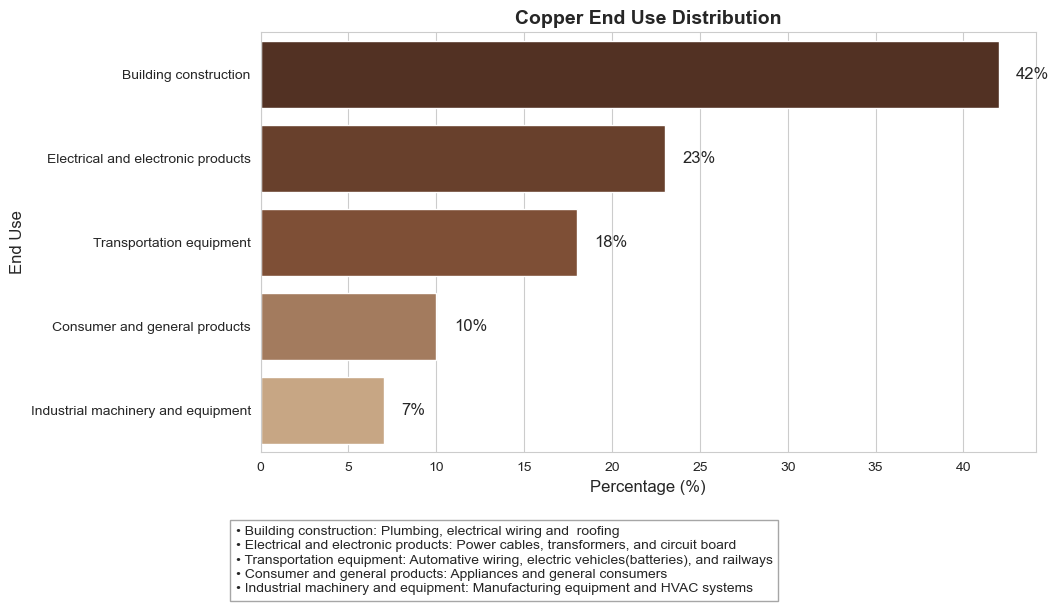

In [113]:
# Convert percent to numeric if needed
if mineral_end_use["percent"].dtype == "object":
    mineral_end_use["percent"] = mineral_end_use["percent"].str.rstrip("%").astype(float)

# Ensure data is sorted in descending order
mineral_end_use = mineral_end_use.sort_values(by="percent", ascending=False)

# Generate a controlled light-to-dark copper gradient (not too light)
palette = sns.blend_palette(["#5a2e1b", "#8a4b2a", "#d2a679"], n_colors=len(mineral_end_use), input="rgb")  

# Set style
sns.set_style("whitegrid")

# Create the bar plot
plt.figure(figsize=(10, 6))
ax = sns.barplot(
    data=mineral_end_use, 
    y="end_use", 
    x="percent", 
    hue="end_use",  
    palette=palette,  # Apply adjusted light-to-dark gradient
    legend=False,  
    orient="h"
)

# Add labels
plt.xlabel("Percentage (%)", fontsize=12)
plt.ylabel("End Use", fontsize=12)
plt.title("Copper End Use Distribution", fontsize=14, fontweight="bold")

# Annotate bars with percentage values
for index, value in enumerate(mineral_end_use["percent"]):
    ax.text(value + 1, index, f"{value}%", va="center", fontsize=12)

# Construct the description text
description_text = "\n".join([f"• {row['end_use']}: {row['description']}" for _, row in mineral_end_use.iterrows()])

# Add footnote box with descriptions **very close to the chart**
plt.figtext(0.1, -0.05, description_text, wrap=True, fontsize=10, ha="left", bbox=dict(facecolor="white", alpha=0.7, edgecolor="gray"))

# Adjust layout to **minimize bottom spacing**
plt.subplots_adjust(bottom=0.18)

# **Define full file path using predefined save_path**
file_name = "copper_end_use_chart.png"
full_save_path = os.path.join(save_path, file_name)

# **Ensure the directory exists before saving**
os.makedirs(save_path, exist_ok=True)

# **Save the chart**
plt.savefig(full_save_path, dpi=300, bbox_inches="tight")

# Show plot
plt.show()

In [59]:
df_cu_clean #recall copper data frame

,source,commodity,country,production_type,unit_meas,supply_cat_value,supply_metrics,year
0,MCS2025,copper,United States,Mine,thousand metric tons,1130,Annual Production,2023
1,MCS2025,copper,Australia,Mine,thousand metric tons,778,Annual Production,2023
2,MCS2025,copper,Canada,Mine,thousand metric tons,500,Annual Production,2023
3,MCS2025,copper,Chile,Mine,thousand metric tons,5250,Annual Production,2023
4,MCS2025,copper,China,Mine,thousand metric tons,1820,Annual Production,2023
...,...,...,...,...,...,...,...,...
76,MCS2025,copper,Peru,Mine,thousand metric tons,100000,Country Reserves,2024
77,MCS2025,copper,Poland,Mine,thousand metric tons,34000,Country Reserves,2024
78,MCS2025,copper,Russia,Mine,thousand metric tons,80000,Country Reserves,2024
79,MCS2025,copper,Zambia,Mine,thousand metric tons,21000,Country Reserves,2024


# Global copper reserves in 2024

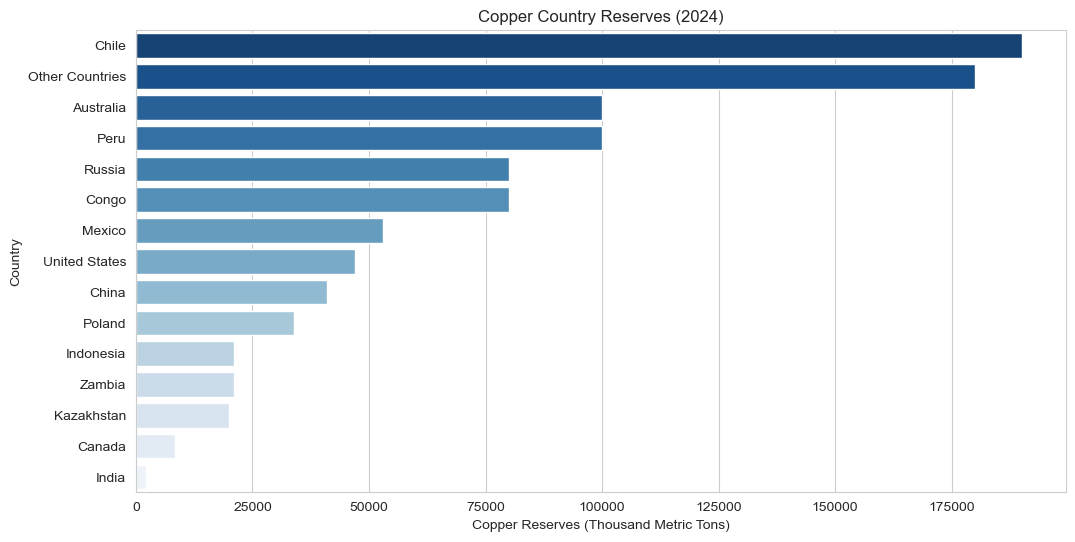

In [114]:
# Filter for Mine Production in 2023
df_mine = df_cu_clean[
    (df_cu_clean["production_type"] == "Mine") & 
    (df_cu_clean["year"] == 2024) & 
    (df_cu_clean["supply_metrics"] == "Country Reserves")
]

# Sort data for better visualization
df_mine = df_mine.sort_values(by="supply_cat_value", ascending=False)

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(x="supply_cat_value", y="country", data=df_mine, hue="country", palette="Blues_r", legend=False)  # FIXED

plt.xlabel("Copper Reserves (Thousand Metric Tons)")
plt.ylabel("Country")
plt.title("Copper Country Reserves (2024)")

# **Define full file path using predefined save_path**
file_name = "copper_reserve_chart.png"
full_save_path = os.path.join(save_path, file_name)

# **Ensure the directory exists before saving**
os.makedirs(save_path, exist_ok=True)

# **Save the chart**
plt.savefig(full_save_path, dpi=300, bbox_inches="tight")

plt.show()

# Copper Mining by Country in 2023 and 2024

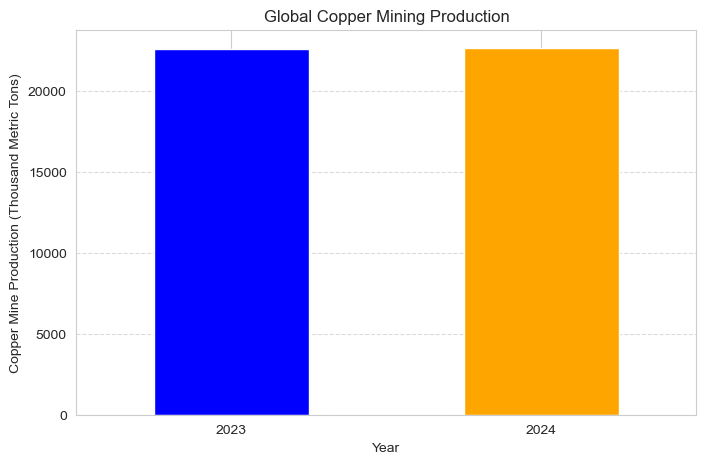

In [115]:
# Filter for Annual Production in 2023 and 2024
df_filtered = df_cu_clean[
    (df_cu_clean["production_type"] == "Mine") & 
    (df_cu_clean["supply_metrics"] == "Annual Production") & 
    (df_cu_clean["year"].isin([2023, 2024]))
]

# Group by Year and Sum Production
df_grouped = df_filtered.groupby("year")["supply_cat_value"].sum()

# Plot
plt.figure(figsize=(8, 5))
df_grouped.plot(kind="bar", color=["blue", "orange"])

# Labels and Title
plt.xlabel("Year")
plt.ylabel("Copper Mine Production (Thousand Metric Tons)")
plt.title("Global Copper Mining Production")
plt.xticks(rotation=0)
plt.grid(axis="y", linestyle="--", alpha=0.7)

# **Define full file path using predefined save_path**
file_name = "copper_global_mining_chart.png"
full_save_path = os.path.join(save_path, file_name)

# **Ensure the directory exists before saving**
os.makedirs(save_path, exist_ok=True)

# **Save the chart**
plt.savefig(full_save_path, dpi=300, bbox_inches="tight")

# Show Plot
plt.show()  #there is no different production 2023 vs 2024 which is expected

<Figure size 1000x600 with 0 Axes>

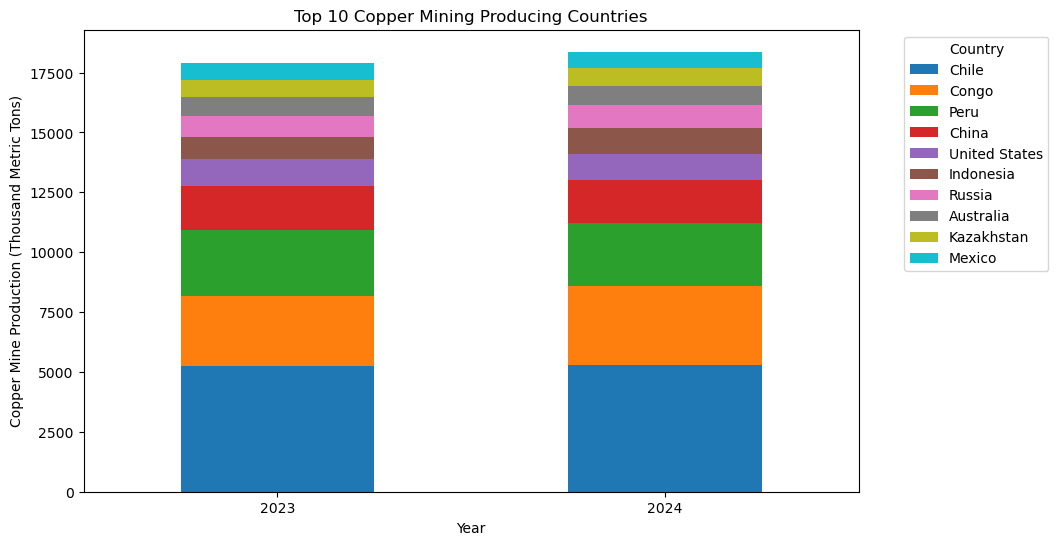

In [62]:
# Confirm if countries global is the same by looking at top 10 producing countries. 
#Filter for Mine production with Annual Production supply metric
df_mine_trend = df_cu_clean[
    (df_cu_clean["production_type"] == "Mine") & 
    (df_cu_clean["supply_metrics"] == "Annual Production") & 
    (df_cu_clean["country"] != "Other Countries")  # Exclude "Other Countries"
]

# Identify top 10 countries based on total production
top_countries = df_mine_trend.groupby("country")["supply_cat_value"].sum().nlargest(10).index

# Filter data for only the top 10 countries
df_top_countries = df_mine_trend[df_mine_trend["country"].isin(top_countries)]

# Group by Year and Country, then sum production
df_grouped = df_top_countries.groupby(["year", "country"])["supply_cat_value"].sum().unstack()

# Sort countries within each year (descending order)
df_grouped = df_grouped.apply(lambda x: x.sort_values(ascending=False), axis=1)

# Plot
plt.figure(figsize=(10, 6))
df_grouped.plot(kind="bar", stacked=True, colormap="tab10", figsize=(10, 6))

# Labels and Title
plt.xlabel("Year")
plt.ylabel("Copper Mine Production (Thousand Metric Tons)")
plt.title("Top 10 Copper Mining Producing Countries")
plt.xticks(rotation=0)
plt.legend(title="Country", bbox_to_anchor=(1.05, 1), loc="upper left")

# Remove grid
plt.grid(False)

# Show Plot
plt.show() #The production for the two years as expected is the same due to the nature of mining industry,
#Mining development takes a long time, there is a significant sunk/upfront cost involved, 
#unless mineral price drop significantly to a point where it make sense to shut down uncompetitive mines, 
#production in near term is like to be fixed  

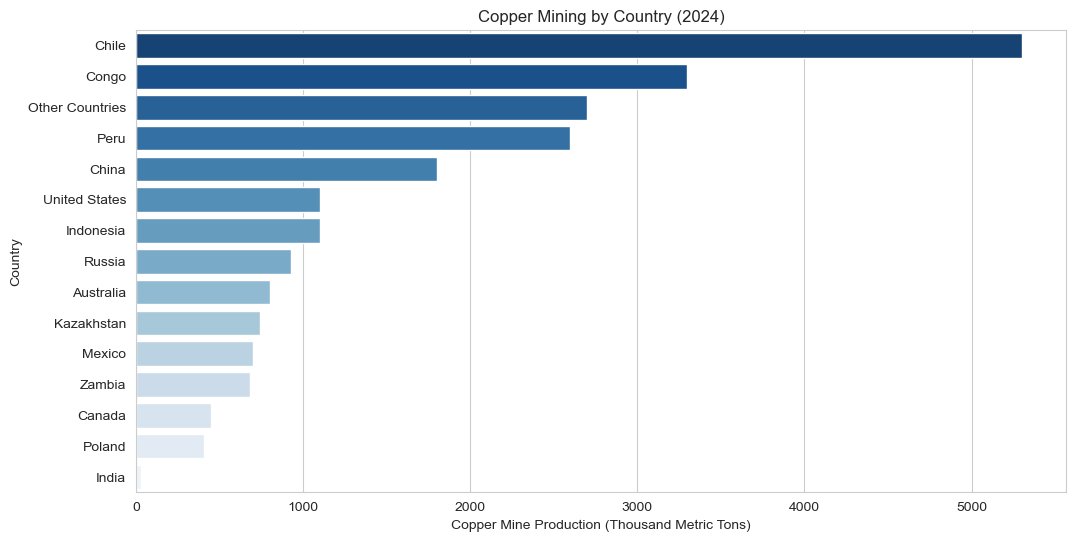

In [116]:
# Since there is no difference between copper in 2023 and 2024 which is expected due to the nature of the mining industry, 
#zoom into 2024 to see countries' global share
#Filter for Mine Production in 2024
df_mine = df_cu_clean[
    (df_cu_clean["production_type"] == "Mine") & 
    (df_cu_clean["year"] == 2024) & 
    (df_cu_clean["supply_metrics"] == "Annual Production")
]

# Sort data for better visualization
df_mine = df_mine.sort_values(by="supply_cat_value", ascending=False)

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(x="supply_cat_value", y="country", data=df_mine, hue="country", palette="Blues_r", legend=False)  # FIXED

plt.xlabel("Copper Mine Production (Thousand Metric Tons)")
plt.ylabel("Country")
plt.title("Copper Mining by Country (2024)")

# **Define full file path using predefined save_path**
file_name = "copper_mining_countries_chart.png"
full_save_path = os.path.join(save_path, file_name)

# **Ensure the directory exists before saving**
os.makedirs(save_path, exist_ok=True)

# **Save the chart**
plt.savefig(full_save_path, dpi=300, bbox_inches="tight")

plt.show()

# Copper Refining by Countries  in 2023 and 2024

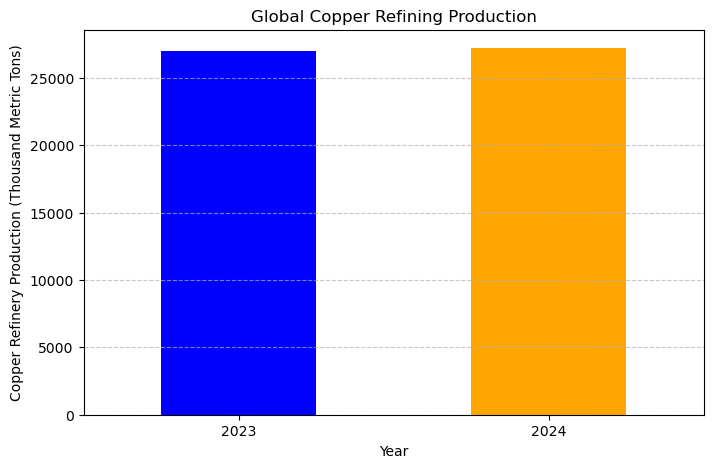

In [64]:
# Filter for Annual Production in 2023 and 2024
df_filtered = df_cu_clean[
    (df_cu_clean["production_type"] == "Refinery") & 
    (df_cu_clean["supply_metrics"] == "Annual Production") & 
    (df_cu_clean["year"].isin([2023, 2024]))
]

# Group by Year and Sum Production
df_grouped = df_filtered.groupby("year")["supply_cat_value"].sum()

# Plot
plt.figure(figsize=(8, 5))
df_grouped.plot(kind="bar", color=["blue", "orange"])

# Labels and Title
plt.xlabel("Year")
plt.ylabel("Copper Refinery Production (Thousand Metric Tons)")
plt.title("Global Copper Refining Production")
plt.xticks(rotation=0)
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Show Plot
plt.show()  #there is no different production 2023 vs 2024 which is expected, similar to mining operation,  refining operations in short term as
#long price are not below the shutdown price, production tends to be fixed. 

<Figure size 1000x600 with 0 Axes>

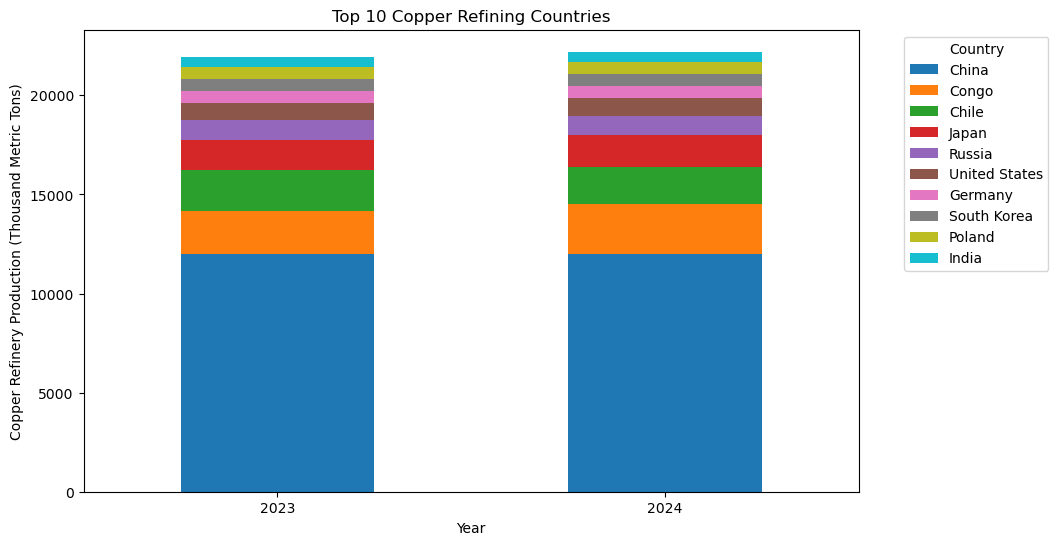

In [65]:
# Confirm if countries global is the same by looking at top 10 producing countries. 
#Filter for Refinery production with Annual Production supply metric
df_mine_trend = df_cu_clean[
    (df_cu_clean["production_type"] == "Refinery") & 
    (df_cu_clean["supply_metrics"] == "Annual Production") & 
    (df_cu_clean["country"] != "Other Countries")  # Exclude "Other Countries"
]

# Identify top 10 countries based on total production
top_countries = df_mine_trend.groupby("country")["supply_cat_value"].sum().nlargest(10).index

# Filter data for only the top 10 countries
df_top_countries = df_mine_trend[df_mine_trend["country"].isin(top_countries)]

# Group by Year and Country, then sum production
df_grouped = df_top_countries.groupby(["year", "country"])["supply_cat_value"].sum().unstack()

# Sort countries within each year (descending order)
df_grouped = df_grouped.apply(lambda x: x.sort_values(ascending=False), axis=1)

# Plot
plt.figure(figsize=(10, 6))
df_grouped.plot(kind="bar", stacked=True, colormap="tab10", figsize=(10, 6))

# Labels and Title
plt.xlabel("Year")
plt.ylabel("Copper Refinery Production (Thousand Metric Tons)")
plt.title("Top 10 Copper Refining Countries")
plt.xticks(rotation=0)
plt.legend(title="Country", bbox_to_anchor=(1.05, 1), loc="upper left")

# Remove grid
plt.grid(False)

# Show Plot
plt.show() #The production for the two years as expected is the same due to the nature of mining industry,
#Mining development takes a long time, there is a significant sunk/upfront cost involved, 
#unless mineral price drop significantly to a point where it make sense to shut down uncompetitive mines, 
#production in near term is like to be fixed 

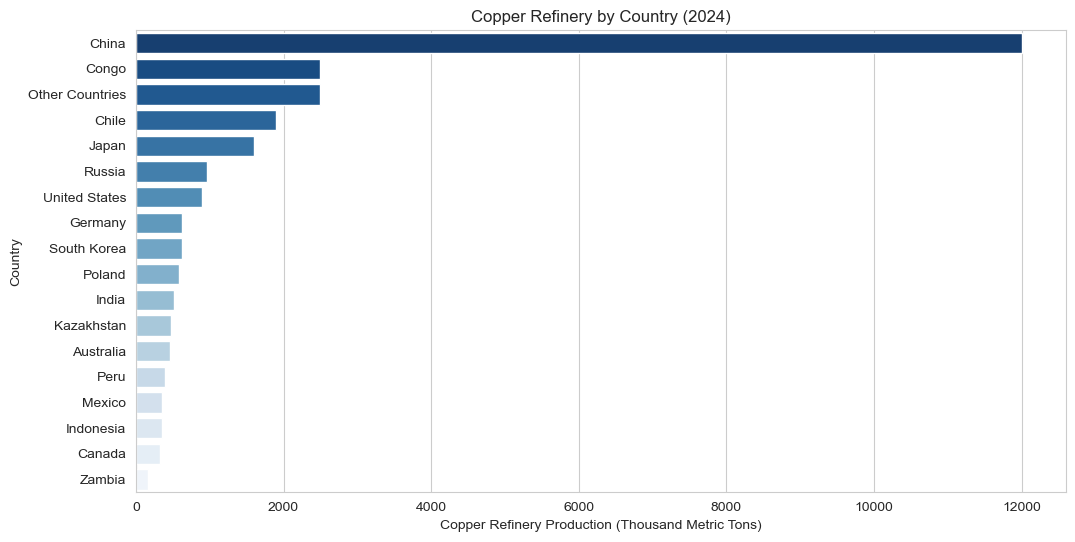

In [117]:
# Since there is no difference between copper refining in 2023 and 2024
#zoom into 2024 to see countries' global share
#Filter for Production in 2024
df_mine = df_cu_clean[
    (df_cu_clean["production_type"] == "Refinery") & 
    (df_cu_clean["year"] == 2024) & 
    (df_cu_clean["supply_metrics"] == "Annual Production")
]

# Sort data for better visualization
df_mine = df_mine.sort_values(by="supply_cat_value", ascending=False)

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(x="supply_cat_value", y="country", data=df_mine, hue="country", palette="Blues_r", legend=False)  # FIXED

plt.xlabel("Copper Refinery Production (Thousand Metric Tons)")
plt.ylabel("Country")
plt.title("Copper Refinery by Country (2024)")

# **Define full file path using predefined save_path**
file_name = "copper_refining_countries_chart.png"
full_save_path = os.path.join(save_path, file_name)

# **Ensure the directory exists before saving**
os.makedirs(save_path, exist_ok=True)

# **Save the chart**
plt.savefig(full_save_path, dpi=300, bbox_inches="tight")
plt.show()

# Comparing Mining Vs Refining Production in 2024

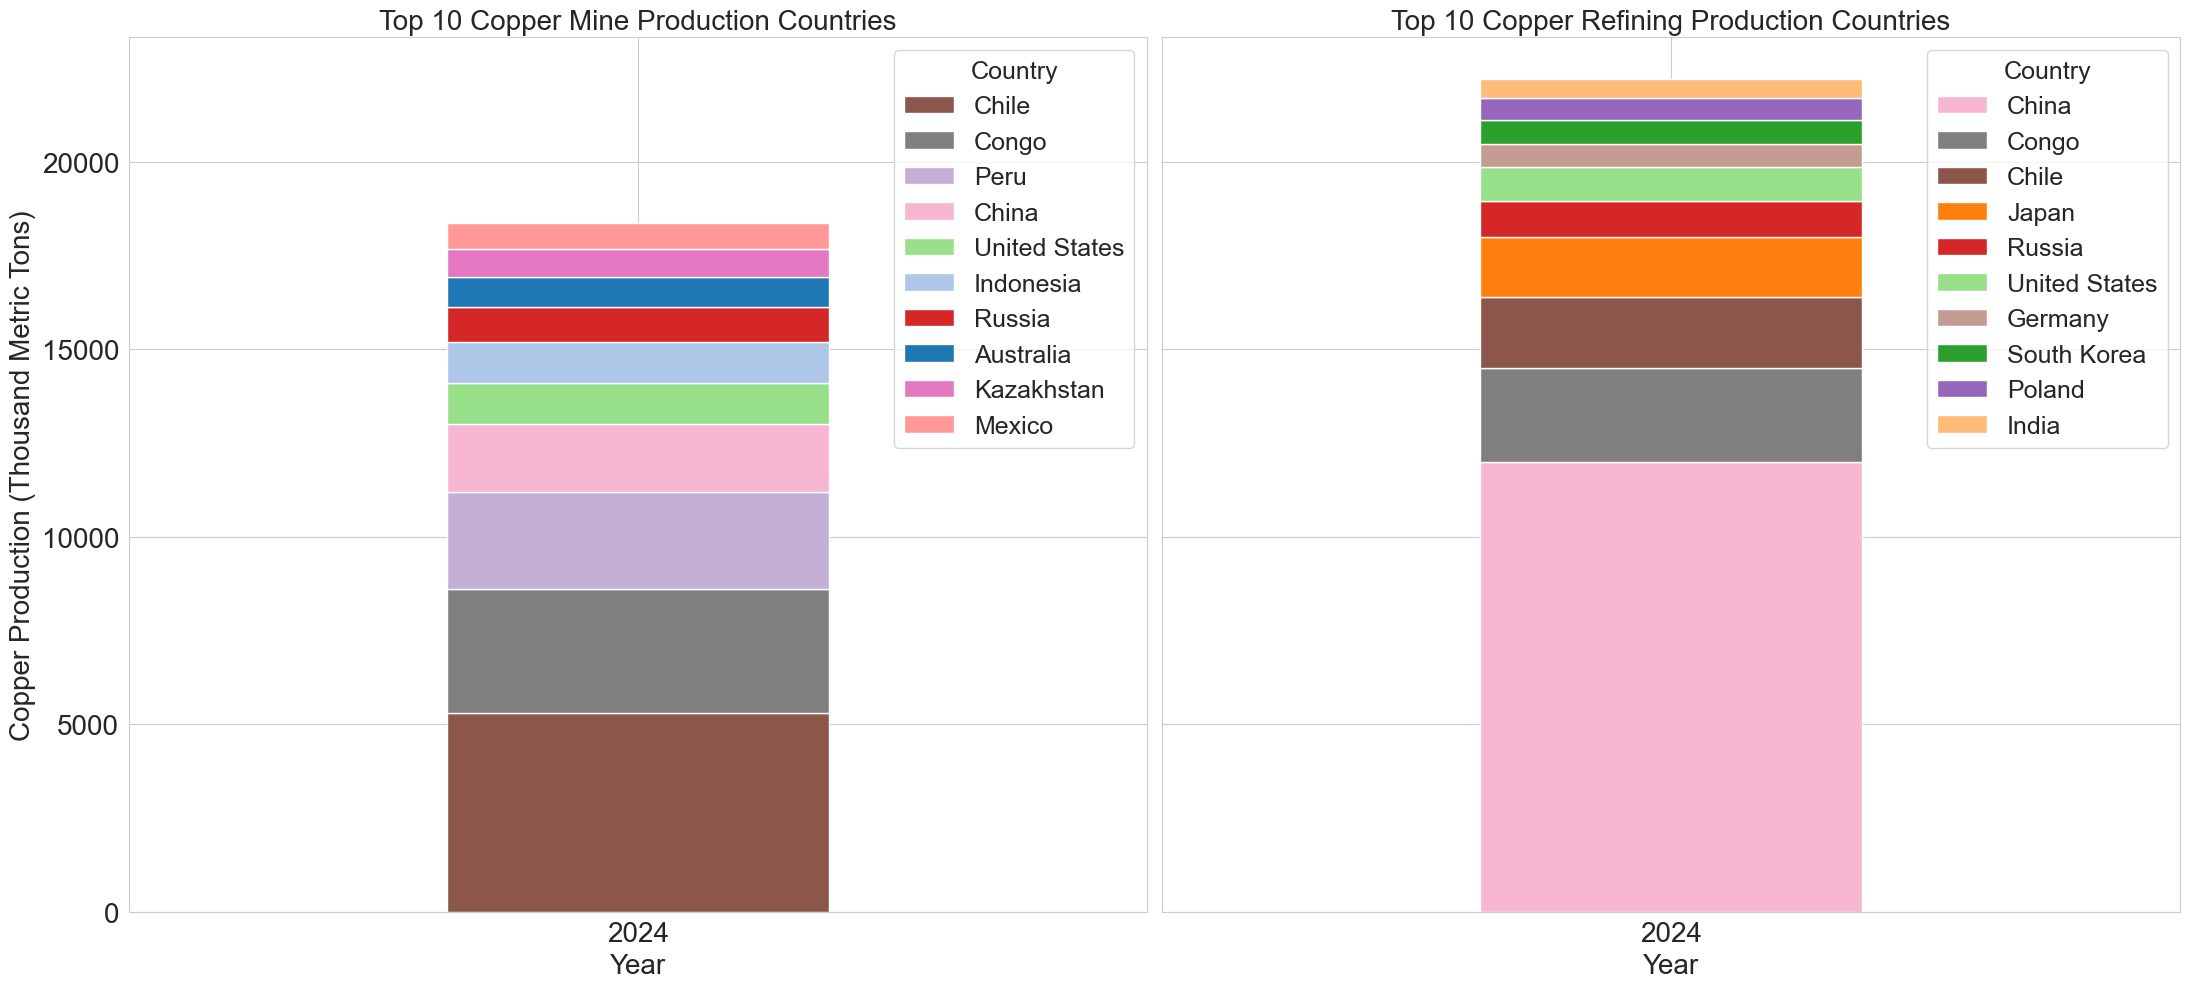

In [120]:
# Filter for Mine and Refinery Production, exclude "Other Countries"
df_mine = df_cu_clean[
    (df_cu_clean["production_type"] == "Mine") & 
    (df_cu_clean["supply_metrics"] == "Annual Production") & 
    (df_cu_clean["country"] != "Other Countries")
]

df_refinery = df_cu_clean[
    (df_cu_clean["production_type"] == "Refinery") & 
    (df_cu_clean["supply_metrics"] == "Annual Production") & 
    (df_cu_clean["country"] != "Other Countries")
]

# Identify top 10 countries dynamically for Mine and Refinery
top_mine_countries = df_mine.groupby("country")["supply_cat_value"].sum().nlargest(10).index.tolist()
top_refinery_countries = df_refinery.groupby("country")["supply_cat_value"].sum().nlargest(10).index.tolist()

# Create a unified list of top countries across both datasets to ensure color consistency
all_top_countries = list(set(top_mine_countries + top_refinery_countries))

# Generate a truly unique color for each country using "tab20" (20 unique colors)
num_countries = len(all_top_countries)
if num_countries <= 20:
    palette = sns.color_palette("tab20", num_countries)
else:
    palette = sns.color_palette("hsv", num_countries)  # For more than 20, use a diverse HSV palette

palette_dict = dict(zip(all_top_countries, palette))  # Assign unique colors to each country

# Filter the data for only the top 10 countries
df_mine = df_mine[df_mine["country"].isin(top_mine_countries)]
df_refinery = df_refinery[df_refinery["country"].isin(top_refinery_countries)]

# Filter for 2024
df_mine = df_mine[df_mine["year"] == 2024]
df_refinery = df_refinery[df_refinery["year"] == 2024]

# Aggregate values to remove duplicates before pivoting
df_mine = df_mine.groupby(["year", "country"])['supply_cat_value'].sum().reset_index()
df_refinery = df_refinery.groupby(["year", "country"])['supply_cat_value'].sum().reset_index()

# Sort countries by total production in descending order
mine_country_order = df_mine.groupby("country")['supply_cat_value'].sum().sort_values(ascending=False).index.tolist()
refinery_country_order = df_refinery.groupby("country")['supply_cat_value'].sum().sort_values(ascending=False).index.tolist()

# Pivot data for stacked bar charts
df_mine_pivot = df_mine.pivot(index="year", columns="country", values="supply_cat_value")[mine_country_order]
df_refinery_pivot = df_refinery.pivot(index="year", columns="country", values="supply_cat_value")[refinery_country_order]

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(22, 10), sharey=True)

# Plot Mine Production
df_mine_pivot.plot(kind="bar", stacked=True, ax=axes[0], width=0.3, color=[palette_dict[c] for c in mine_country_order])
axes[0].set_xlabel("Year", fontsize=20)
axes[0].set_ylabel("Copper Production (Thousand Metric Tons)", fontsize=20)
axes[0].set_title("Top 10 Copper Mine Production Countries", fontsize=20)
axes[0].legend(title="Country", loc='upper right', fontsize=18, title_fontsize=18)
axes[0].set_xticklabels(df_mine_pivot.index, rotation=0, fontsize=20)

# Plot Refining Production
df_refinery_pivot.plot(kind="bar", stacked=True, ax=axes[1], width=0.3, color=[palette_dict[c] for c in refinery_country_order])
axes[1].set_xlabel("Year", fontsize=20)
axes[1].set_title("Top 10 Copper Refining Production Countries", fontsize=20)
axes[1].legend(title="Country", loc='upper right', fontsize=18, title_fontsize=18)
axes[1].set_xticklabels(df_refinery_pivot.index, rotation=0, fontsize=20)

# Adjust y-axis label size
axes[0].tick_params(axis='y', labelsize=20)
axes[1].tick_params(axis='y', labelsize=20)

plt.tight_layout()

# **Define full file path using predefined save_path**
file_name = "copper_miningvsrefining_chart.png"
full_save_path = os.path.join(save_path, file_name)

# **Ensure the directory exists before saving**
os.makedirs(save_path, exist_ok=True)

# **Save the chart**
plt.savefig(full_save_path, dpi=300, bbox_inches="tight")

plt.show()

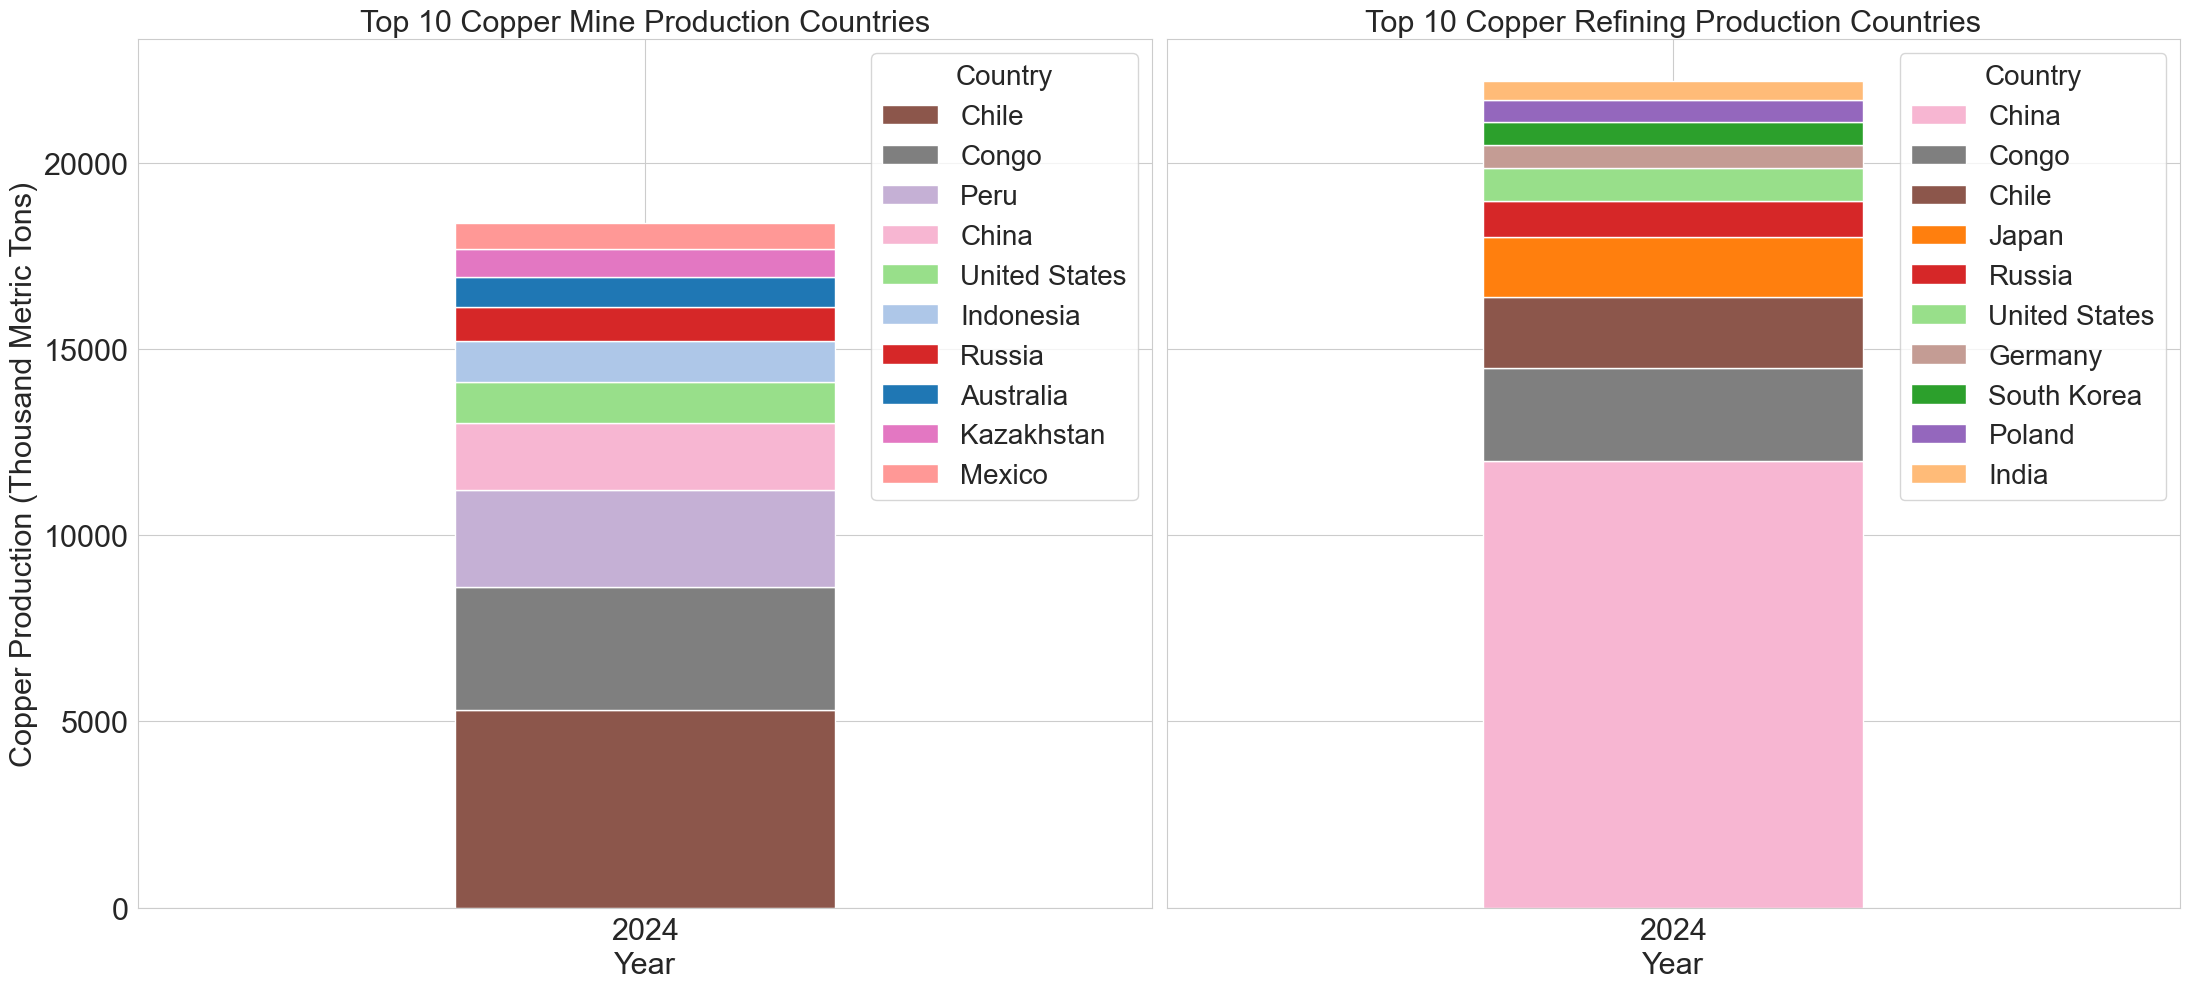

In [122]:
import os
import matplotlib.pyplot as plt
import seaborn as sns

# Filter for Mine and Refinery Production, exclude "Other Countries"
df_mine = df_cu_clean[
    (df_cu_clean["production_type"] == "Mine") & 
    (df_cu_clean["supply_metrics"] == "Annual Production") & 
    (df_cu_clean["country"] != "Other Countries")
]

df_refinery = df_cu_clean[
    (df_cu_clean["production_type"] == "Refinery") & 
    (df_cu_clean["supply_metrics"] == "Annual Production") & 
    (df_cu_clean["country"] != "Other Countries")
]

# Identify top 10 countries dynamically for Mine and Refinery
top_mine_countries = df_mine.groupby("country")["supply_cat_value"].sum().nlargest(10).index.tolist()
top_refinery_countries = df_refinery.groupby("country")["supply_cat_value"].sum().nlargest(10).index.tolist()

# Create a unified list of top countries across both datasets to ensure color consistency
all_top_countries = list(set(top_mine_countries + top_refinery_countries))

# Generate unique colors for each country using "tab20" (20 unique colors)
num_countries = len(all_top_countries)
palette = sns.color_palette("tab20", num_countries) if num_countries <= 20 else sns.color_palette("hsv", num_countries)

palette_dict = dict(zip(all_top_countries, palette))  # Assign unique colors to each country

# Filter the data for only the top 10 countries
df_mine = df_mine[df_mine["country"].isin(top_mine_countries)]
df_refinery = df_refinery[df_refinery["country"].isin(top_refinery_countries)]

# Filter for 2024
df_mine = df_mine[df_mine["year"] == 2024]
df_refinery = df_refinery[df_refinery["year"] == 2024]

# Aggregate values to remove duplicates before pivoting
df_mine = df_mine.groupby(["year", "country"])['supply_cat_value'].sum().reset_index()
df_refinery = df_refinery.groupby(["year", "country"])['supply_cat_value'].sum().reset_index()

# Sort countries by total production in descending order
mine_country_order = df_mine.groupby("country")['supply_cat_value'].sum().sort_values(ascending=False).index.tolist()
refinery_country_order = df_refinery.groupby("country")['supply_cat_value'].sum().sort_values(ascending=False).index.tolist()

# Pivot data for stacked bar charts
df_mine_pivot = df_mine.pivot(index="year", columns="country", values="supply_cat_value")[mine_country_order]
df_refinery_pivot = df_refinery.pivot(index="year", columns="country", values="supply_cat_value")[refinery_country_order]

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(22, 10), sharey=True)

# Updated font sizes (10% increase)
label_fontsize = 22  # Previously 20
title_fontsize = 22  # Previously 20
legend_fontsize = 20  # Previously 18
tick_fontsize = 22  # Previously 20

# Plot Mine Production
df_mine_pivot.plot(kind="bar", stacked=True, ax=axes[0], width=0.3, color=[palette_dict[c] for c in mine_country_order])
axes[0].set_xlabel("Year", fontsize=label_fontsize)
axes[0].set_ylabel("Copper Production (Thousand Metric Tons)", fontsize=label_fontsize)
axes[0].set_title("Top 10 Copper Mine Production Countries", fontsize=title_fontsize)
axes[0].legend(title="Country", loc='upper right', fontsize=legend_fontsize, title_fontsize=legend_fontsize)
axes[0].set_xticklabels(df_mine_pivot.index, rotation=0, fontsize=tick_fontsize)

# Plot Refining Production
df_refinery_pivot.plot(kind="bar", stacked=True, ax=axes[1], width=0.3, color=[palette_dict[c] for c in refinery_country_order])
axes[1].set_xlabel("Year", fontsize=label_fontsize)
axes[1].set_title("Top 10 Copper Refining Production Countries", fontsize=title_fontsize)
axes[1].legend(title="Country", loc='upper right', fontsize=legend_fontsize, title_fontsize=legend_fontsize)
axes[1].set_xticklabels(df_refinery_pivot.index, rotation=0, fontsize=tick_fontsize)

# Adjust y-axis label size
axes[0].tick_params(axis='y', labelsize=tick_fontsize)
axes[1].tick_params(axis='y', labelsize=tick_fontsize)

plt.tight_layout()

# **Define full file path using predefined save_path**
file_name = "copper_miningvsrefining_chart.png"
full_save_path = os.path.join(save_path, file_name)

# **Ensure the directory exists before saving**
os.makedirs(save_path, exist_ok=True)

# **Save the chart**
plt.savefig(full_save_path, dpi=300, bbox_inches="tight")

plt.show()

# Importer and exporter of Copper products

In [68]:
df_trade_cu_clean

,year,country,trade_flow,destination,hs_code,commodity,value_type,trade_value,unit
0,2024,Azerbaijan,Import,World,260300,ores and concentrates,cif_value,296.0,USD
2,2024,Australia,Import,World,260300,ores and concentrates,cif_value,167691.0,USD
4,2024,Armenia,Import,World,260300,ores and concentrates,cif_value,2.0,USD
6,2024,Belgium,Import,World,260300,ores and concentrates,cif_value,1729850.0,USD
8,2024,Brazil,Import,World,260300,ores and concentrates,cif_value,2770.0,USD
...,...,...,...,...,...,...,...,...,...
709,2024,United Kingdom,Export,World,740319,refined copper,primary_value,5220735.0,USD
710,2024,United States,Import,World,740319,refined copper,primary_value,15538194.0,USD
711,2024,United States,Export,World,740319,refined copper,primary_value,125504807.0,USD
712,2024,Burkina Faso,Import,World,740319,refined copper,primary_value,5154.0,USD


In [69]:
df_trade_cu_clean['commodity'].unique()

array(['ores and concentrates', 'refined copper'], dtype=object)

In [70]:
df_trade_cu_clean['value_type'].unique()

array(['cif_value', 'fob_value', 'primary_value'], dtype=object)

In [71]:
df_trade_cu_clean['trade_flow'].unique()

array(['Import', 'Export'], dtype=object)

C:\Users\Tisi\AppData\Local\Temp\ipykernel_15748\121673024.py:48: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  df_ores_import_pivot = df_ores_import_top.pivot_table(index="country", columns="year", values="trade_value", aggfunc="sum").fillna(0)
C:\Users\Tisi\AppData\Local\Temp\ipykernel_15748\121673024.py:51: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  df_refined_import_pivot = df_refined_import_top.pivot_table(index="country", columns="year", values="trade_value", aggfunc="sum").fillna(0)
C:\Users\Tisi\AppData\Local\Temp\ipykernel_15748\121673024.py:54: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a futur

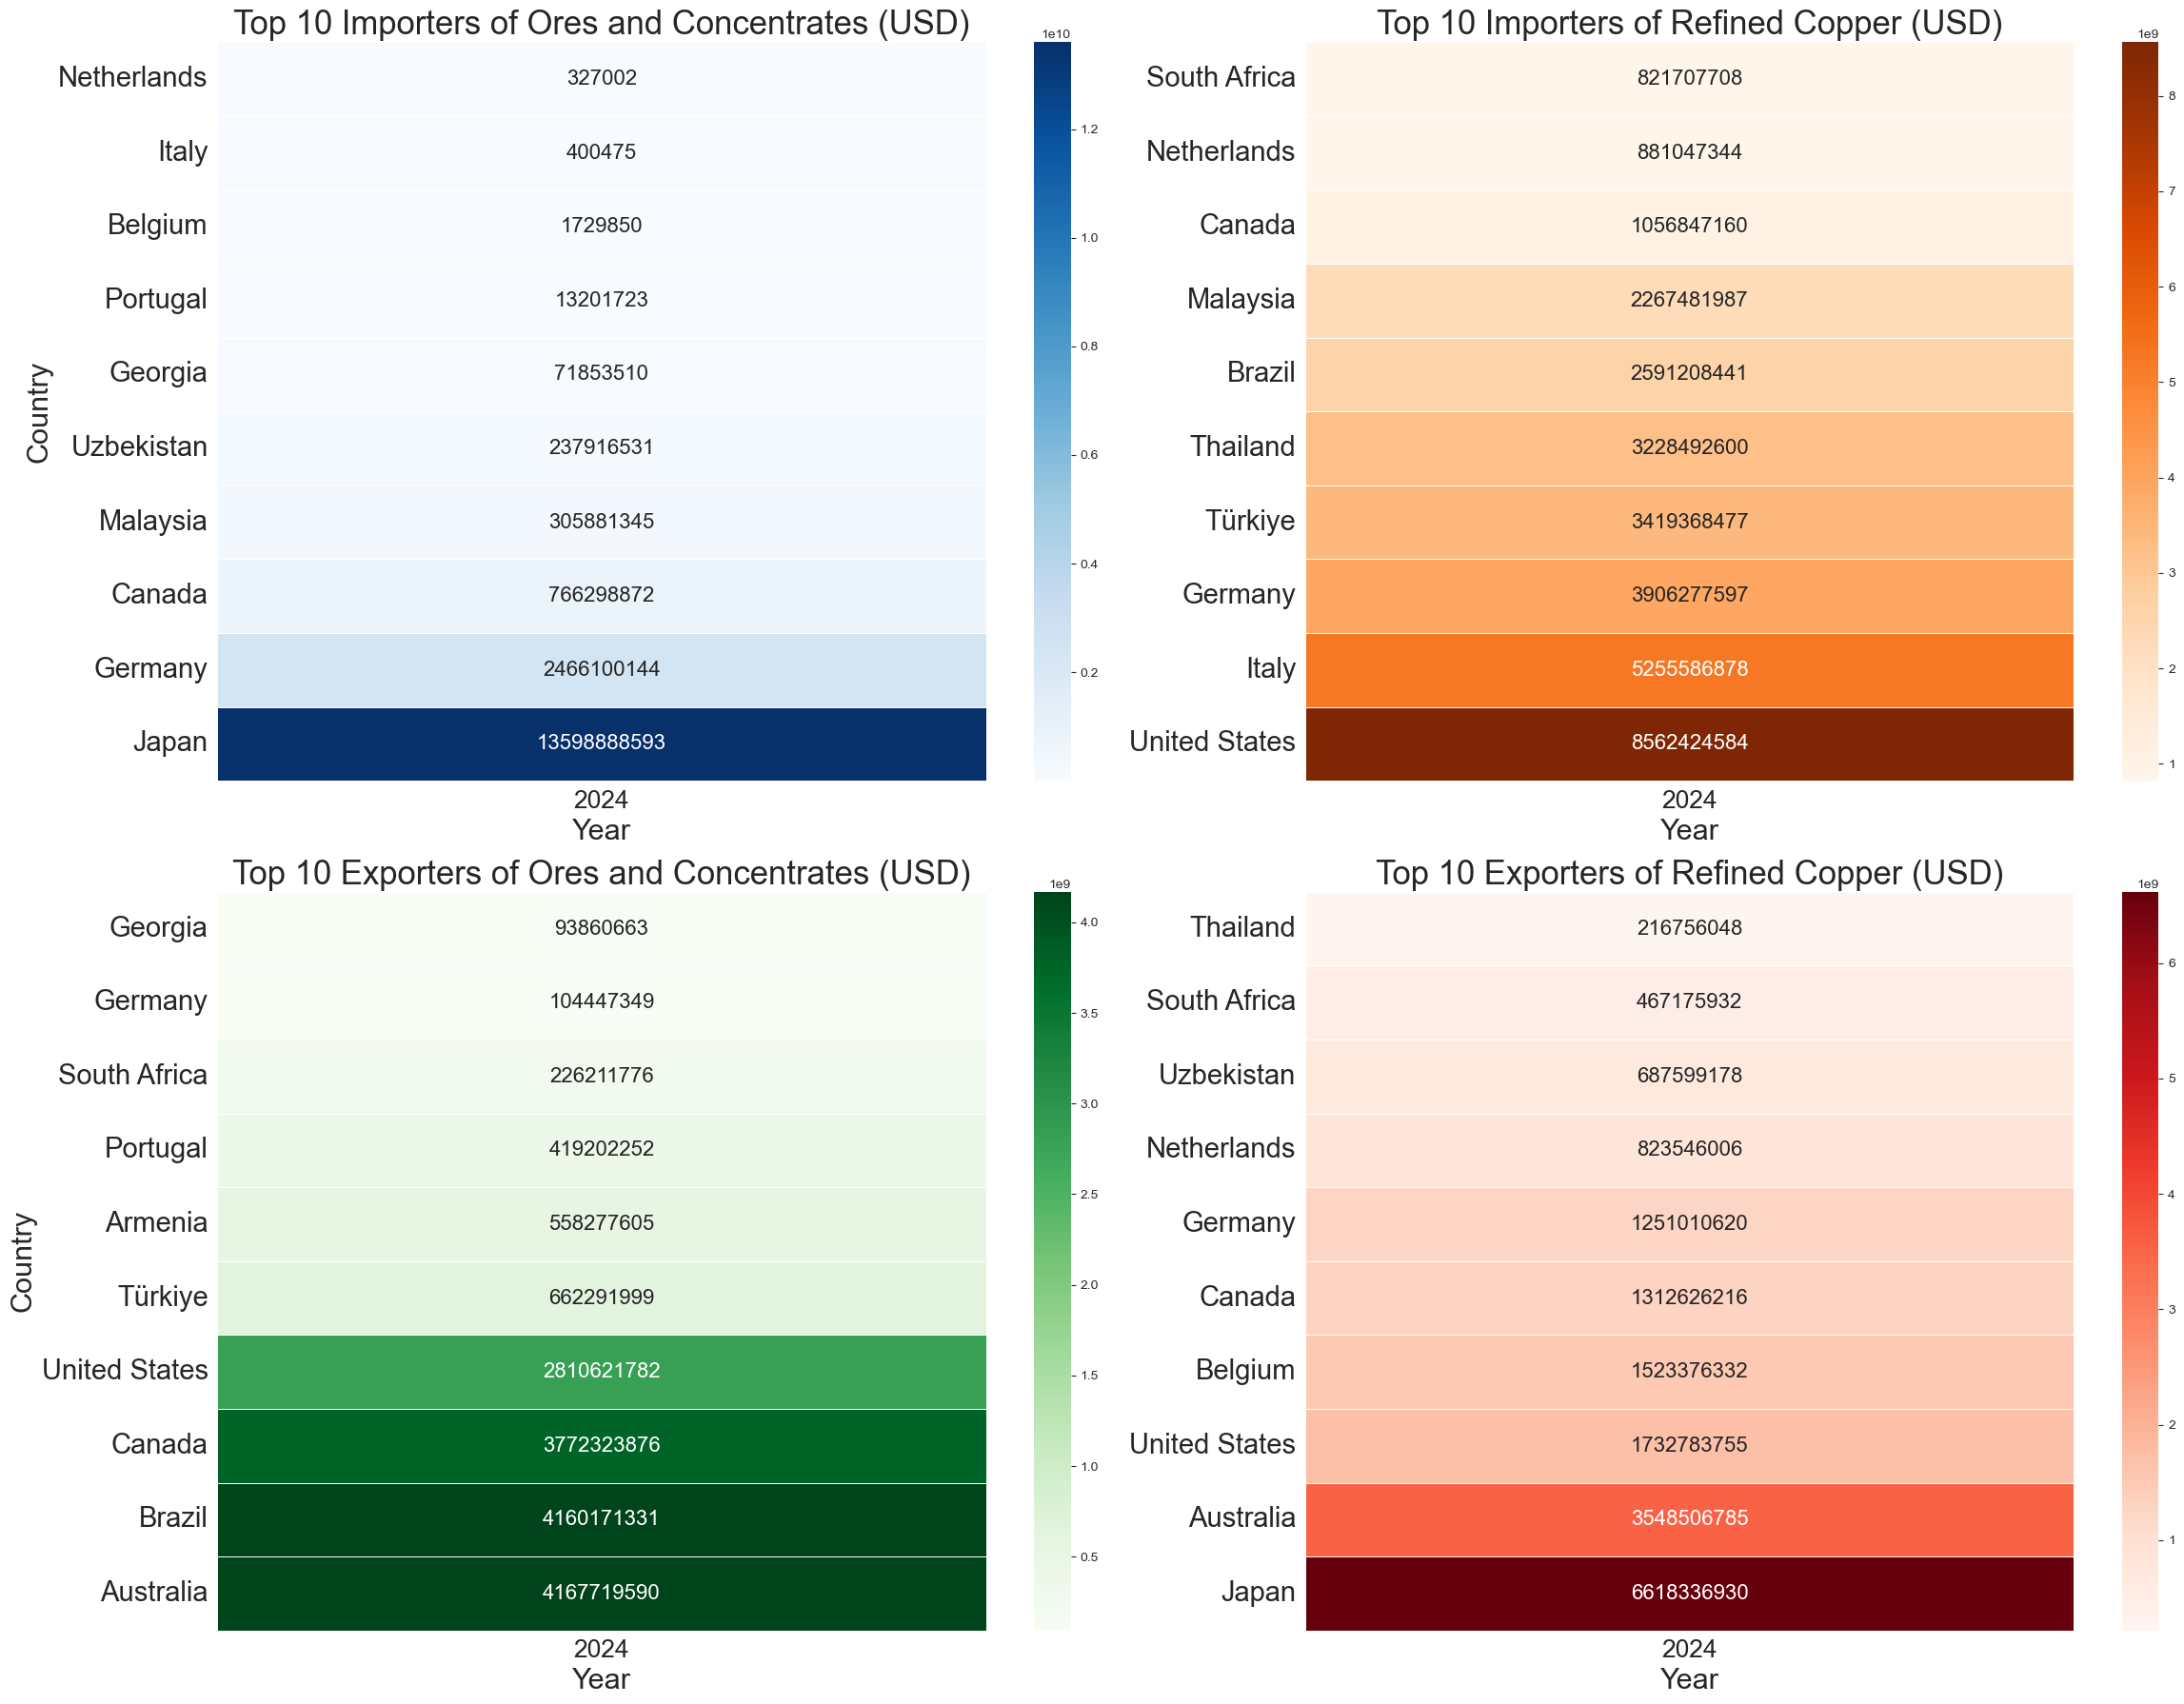

In [127]:
# Filter data for Imports and Exports with correct value types
df_import = df_trade_cu_clean[
    (df_trade_cu_clean["trade_flow"] == "Import") & 
    (df_trade_cu_clean["value_type"] == "cif_value")
].copy()

df_export = df_trade_cu_clean[
    (df_trade_cu_clean["trade_flow"] == "Export") & 
    (df_trade_cu_clean["value_type"] == "fob_value")
].copy()

# Separate data for 'Ores and Concentrates' and 'Refined Copper'
df_ores_import = df_import[df_import["commodity"] == "ores and concentrates"].copy()
df_refined_import = df_import[df_import["commodity"] == "refined copper"].copy()

df_ores_export = df_export[df_export["commodity"] == "ores and concentrates"].copy()
df_refined_export = df_export[df_export["commodity"] == "refined copper"].copy()

# Get top 10 importing & exporting countries (sorted)
top_ores_importers = df_ores_import.groupby("country")["trade_value"].sum().nlargest(10).index
top_refined_importers = df_refined_import.groupby("country")["trade_value"].sum().nlargest(10).index

top_ores_exporters = df_ores_export.groupby("country")["trade_value"].sum().nlargest(10).index
top_refined_exporters = df_refined_export.groupby("country")["trade_value"].sum().nlargest(10).index

# Filter top 10 countries
df_ores_import_top = df_ores_import[df_ores_import["country"].isin(top_ores_importers)].copy()
df_refined_import_top = df_refined_import[df_refined_import["country"].isin(top_refined_importers)].copy()

df_ores_export_top = df_ores_export[df_ores_export["country"].isin(top_ores_exporters)].copy()
df_refined_export_top = df_refined_export[df_refined_export["country"].isin(top_refined_exporters)].copy()

# Sort countries by trade value (largest at the top)
ores_import_sorted = df_ores_import_top.groupby("country")["trade_value"].sum().sort_values(ascending=False).index
refined_import_sorted = df_refined_import_top.groupby("country")["trade_value"].sum().sort_values(ascending=False).index

ores_export_sorted = df_ores_export_top.groupby("country")["trade_value"].sum().sort_values(ascending=False).index
refined_export_sorted = df_refined_export_top.groupby("country")["trade_value"].sum().sort_values(ascending=False).index

# Assign sorted categorical order
df_ores_import_top["country"] = pd.Categorical(df_ores_import_top["country"], categories=ores_import_sorted[::-1], ordered=True)
df_refined_import_top["country"] = pd.Categorical(df_refined_import_top["country"], categories=refined_import_sorted[::-1], ordered=True)

df_ores_export_top["country"] = pd.Categorical(df_ores_export_top["country"], categories=ores_export_sorted[::-1], ordered=True)
df_refined_export_top["country"] = pd.Categorical(df_refined_export_top["country"], categories=refined_export_sorted[::-1], ordered=True)

# Pivot for heatmap (ensuring correct order in the pivoted table)
df_ores_import_pivot = df_ores_import_top.pivot_table(index="country", columns="year", values="trade_value", aggfunc="sum").fillna(0)
df_ores_import_pivot = df_ores_import_pivot.loc[ores_import_sorted[::-1]]  

df_refined_import_pivot = df_refined_import_top.pivot_table(index="country", columns="year", values="trade_value", aggfunc="sum").fillna(0)
df_refined_import_pivot = df_refined_import_pivot.loc[refined_import_sorted[::-1]]  

df_ores_export_pivot = df_ores_export_top.pivot_table(index="country", columns="year", values="trade_value", aggfunc="sum").fillna(0)
df_ores_export_pivot = df_ores_export_pivot.loc[ores_export_sorted[::-1]]  

df_refined_export_pivot = df_refined_export_top.pivot_table(index="country", columns="year", values="trade_value", aggfunc="sum").fillna(0)
df_refined_export_pivot = df_refined_export_pivot.loc[refined_export_sorted[::-1]]  

# Set up the figure with increased height for better spacing
fig, axes = plt.subplots(2, 2, figsize=(24, 18))  

# Define optimized font sizes
title_font = int(32 * 0.8)  
label_font = int(28 * 0.8)  
tick_font = int(24 * 0.8)  
annot_font = int(20 * 0.8)  

# Heatmap for Ores and Concentrates Import
sns.heatmap(df_ores_import_pivot, cmap="Blues", linewidths=0.5, annot=True, fmt=".0f", ax=axes[0, 0], annot_kws={"size": annot_font})
axes[0, 0].set_title("Top 10 Importers of Ores and Concentrates (USD)", fontsize=title_font)
axes[0, 0].set_xlabel("Year", fontsize=label_font)
axes[0, 0].set_ylabel("Country", fontsize=label_font)
axes[0, 0].tick_params(axis='x', labelsize=tick_font)
axes[0, 0].tick_params(axis='y', labelsize=tick_font + 2)
axes[0, 0].set_yticklabels(axes[0, 0].get_yticklabels(), rotation=0, ha="right")  

# Heatmap for Refined Copper Import
sns.heatmap(df_refined_import_pivot, cmap="Oranges", linewidths=0.5, annot=True, fmt=".0f", ax=axes[0, 1], annot_kws={"size": annot_font})
axes[0, 1].set_title("Top 10 Importers of Refined Copper (USD)", fontsize=title_font)
axes[0, 1].set_xlabel("Year", fontsize=label_font)
axes[0, 1].set_ylabel("")  
axes[0, 1].tick_params(axis='x', labelsize=tick_font)
axes[0, 1].tick_params(axis='y', labelsize=tick_font + 2)
axes[0, 1].set_yticklabels(axes[0, 1].get_yticklabels(), rotation=0, ha="right")

# Heatmap for Ores and Concentrates Export
sns.heatmap(df_ores_export_pivot, cmap="Greens", linewidths=0.5, annot=True, fmt=".0f", ax=axes[1, 0], annot_kws={"size": annot_font})
axes[1, 0].set_title("Top 10 Exporters of Ores and Concentrates (USD)", fontsize=title_font)
axes[1, 0].set_xlabel("Year", fontsize=label_font)
axes[1, 0].set_ylabel("Country", fontsize=label_font)
axes[1, 0].tick_params(axis='x', labelsize=tick_font)
axes[1, 0].tick_params(axis='y', labelsize=tick_font + 2)
axes[1, 0].set_yticklabels(axes[1, 0].get_yticklabels(), rotation=0, ha="right")

# Heatmap for Refined Copper Export
sns.heatmap(df_refined_export_pivot, cmap="Reds", linewidths=0.5, annot=True, fmt=".0f", ax=axes[1, 1], annot_kws={"size": annot_font})
axes[1, 1].set_title("Top 10 Exporters of Refined Copper (USD)", fontsize=title_font)
axes[1, 1].set_xlabel("Year", fontsize=label_font)
axes[1, 1].set_ylabel("")  
axes[1, 1].tick_params(axis='x', labelsize=tick_font)
axes[1, 1].tick_params(axis='y', labelsize=tick_font + 2)
axes[1, 1].set_yticklabels(axes[1, 1].get_yticklabels(), rotation=0, ha="right")

plt.tight_layout()

# **Define full file path using predefined save_path**
file_name = "copper_trade_all_chart.png"
full_save_path = os.path.join(save_path, file_name)

# **Ensure the directory exists before saving**
os.makedirs(save_path, exist_ok=True)

# **Save the chart**
plt.savefig(full_save_path, dpi=300, bbox_inches="tight")

plt.show()

C:\Users\Tisi\AppData\Local\Temp\ipykernel_15748\1859247614.py:27: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  df_ores_pivot = df_ores_top.pivot_table(index="country", columns="year", values="trade_value", aggfunc="sum").fillna(0)
C:\Users\Tisi\AppData\Local\Temp\ipykernel_15748\1859247614.py:30: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  df_refined_pivot = df_refined_top.pivot_table(index="country", columns="year", values="trade_value", aggfunc="sum").fillna(0)


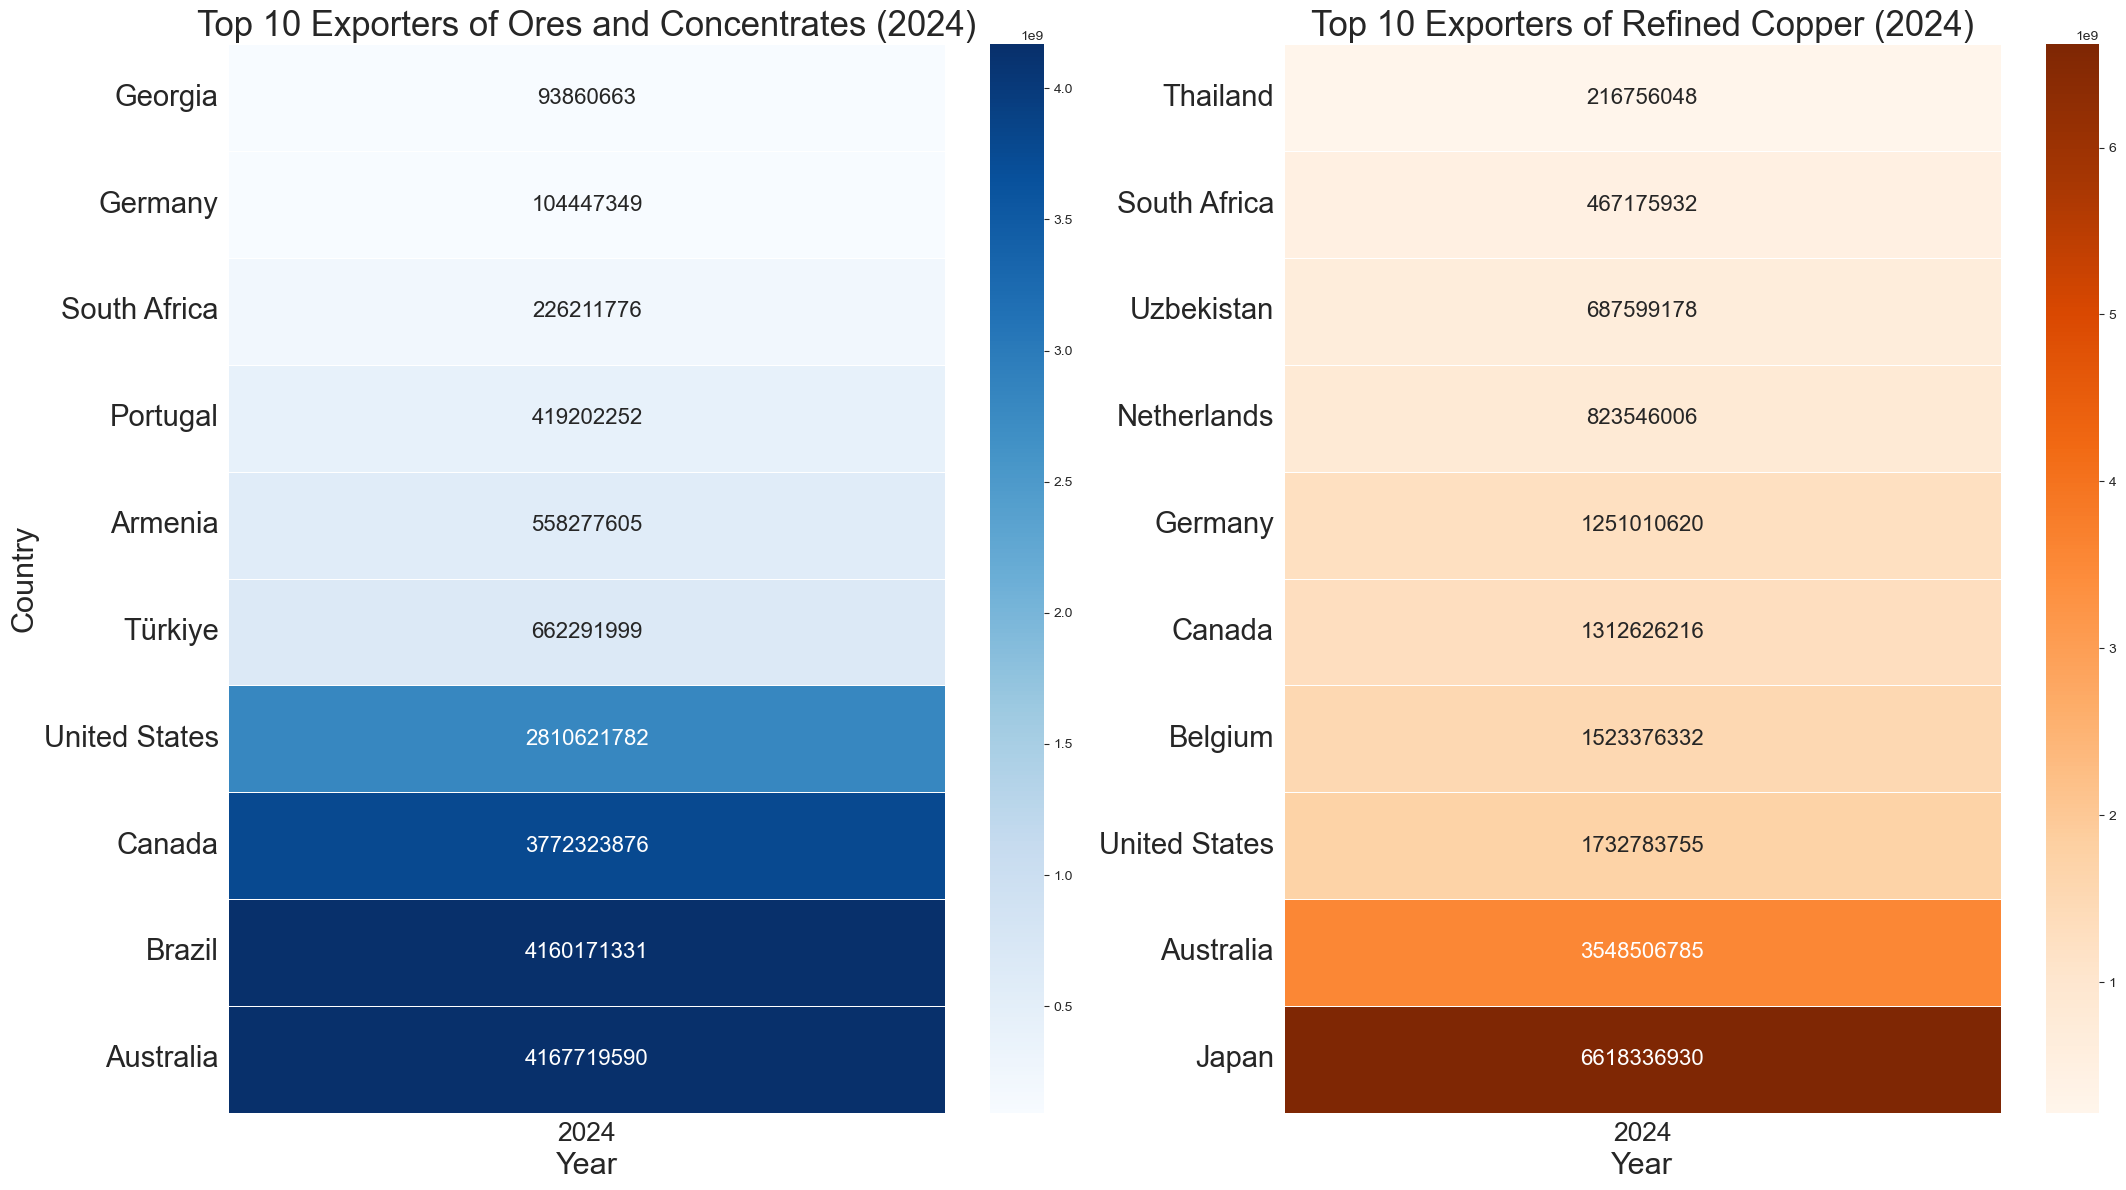

In [126]:
# Filter only Export data with FOB value
df_export = df_trade_cu_clean[
    (df_trade_cu_clean["trade_flow"] == "Export") & 
    (df_trade_cu_clean["value_type"] == "fob_value")
].copy()

# Separate data for 'Ores and Concentrates' and 'Refined Copper'
df_ores = df_export[df_export["commodity"] == "ores and concentrates"].copy()
df_refined = df_export[df_export["commodity"] == "refined copper"].copy()

# Get top 10 exporting countries for each commodity (sorted by total export value)
top_ores_countries = df_ores.groupby("country")["trade_value"].sum().nlargest(10).index
top_refined_countries = df_refined.groupby("country")["trade_value"].sum().nlargest(10).index

# Filter data for only top 10 countries
df_ores_top = df_ores[df_ores["country"].isin(top_ores_countries)].copy()
df_refined_top = df_refined[df_refined["country"].isin(top_refined_countries)].copy()

# Sort by total export value (ensuring largest exporter is at the top)
ores_sorted = df_ores_top.groupby("country")["trade_value"].sum().sort_values(ascending=False).index
refined_sorted = df_refined_top.groupby("country")["trade_value"].sum().sort_values(ascending=False).index

df_ores_top["country"] = pd.Categorical(df_ores_top["country"], categories=ores_sorted[::-1], ordered=True)
df_refined_top["country"] = pd.Categorical(df_refined_top["country"], categories=refined_sorted[::-1], ordered=True)

# Pivot for heatmap (ensuring correct order in the pivoted table)
df_ores_pivot = df_ores_top.pivot_table(index="country", columns="year", values="trade_value", aggfunc="sum").fillna(0)
df_ores_pivot = df_ores_pivot.loc[ores_sorted[::-1]]  # Sorting after pivot

df_refined_pivot = df_refined_top.pivot_table(index="country", columns="year", values="trade_value", aggfunc="sum").fillna(0)
df_refined_pivot = df_refined_pivot.loc[refined_sorted[::-1]]  # Sorting after pivot

# Set up the figure with increased height for better spacing
fig, axes = plt.subplots(1, 2, figsize=(22, 12))  

# Define optimized font sizes
title_font = int(32 * 0.8)  
label_font = int(28 * 0.8)  
tick_font = int(24 * 0.8)  
annot_font = int(20 * 0.8)  

# Heatmap for Ores and Concentrates (sorted)
sns.heatmap(df_ores_pivot, cmap="Blues", linewidths=0.5, annot=True, fmt=".0f", ax=axes[0], annot_kws={"size": annot_font})
axes[0].set_title("Top 10 Exporters of Ores and Concentrates (2024)", fontsize=title_font)
axes[0].set_xlabel("Year", fontsize=label_font)
axes[0].set_ylabel("Country", fontsize=label_font)
axes[0].tick_params(axis='x', labelsize=tick_font)
axes[0].tick_params(axis='y', labelsize=tick_font + 2)
axes[0].set_yticklabels(axes[0].get_yticklabels(), rotation=0, ha="right")  

# Heatmap for Refined Copper (sorted)
sns.heatmap(df_refined_pivot, cmap="Oranges", linewidths=0.5, annot=True, fmt=".0f", ax=axes[1], annot_kws={"size": annot_font})
axes[1].set_title("Top 10 Exporters of Refined Copper (2024)", fontsize=title_font)
axes[1].set_xlabel("Year", fontsize=label_font)
axes[1].set_ylabel("")  
axes[1].tick_params(axis='x', labelsize=tick_font)
axes[1].tick_params(axis='y', labelsize=tick_font + 2)
axes[1].set_yticklabels(axes[1].get_yticklabels(), rotation=0, ha="right")

plt.tight_layout()

# **Define full file path using predefined save_path**
file_name = "copper_trade_export_chart.png"
full_save_path = os.path.join(save_path, file_name)

# **Ensure the directory exists before saving**
os.makedirs(save_path, exist_ok=True)

# **Save the chart**
plt.savefig(full_save_path, dpi=300, bbox_inches="tight")
plt.show()

C:\Users\Tisi\AppData\Local\Temp\ipykernel_15748\4067774957.py:27: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  df_ores_pivot = df_ores_top.pivot_table(index="country", columns="year", values="trade_value", aggfunc="sum").fillna(0)
C:\Users\Tisi\AppData\Local\Temp\ipykernel_15748\4067774957.py:30: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  df_refined_pivot = df_refined_top.pivot_table(index="country", columns="year", values="trade_value", aggfunc="sum").fillna(0)


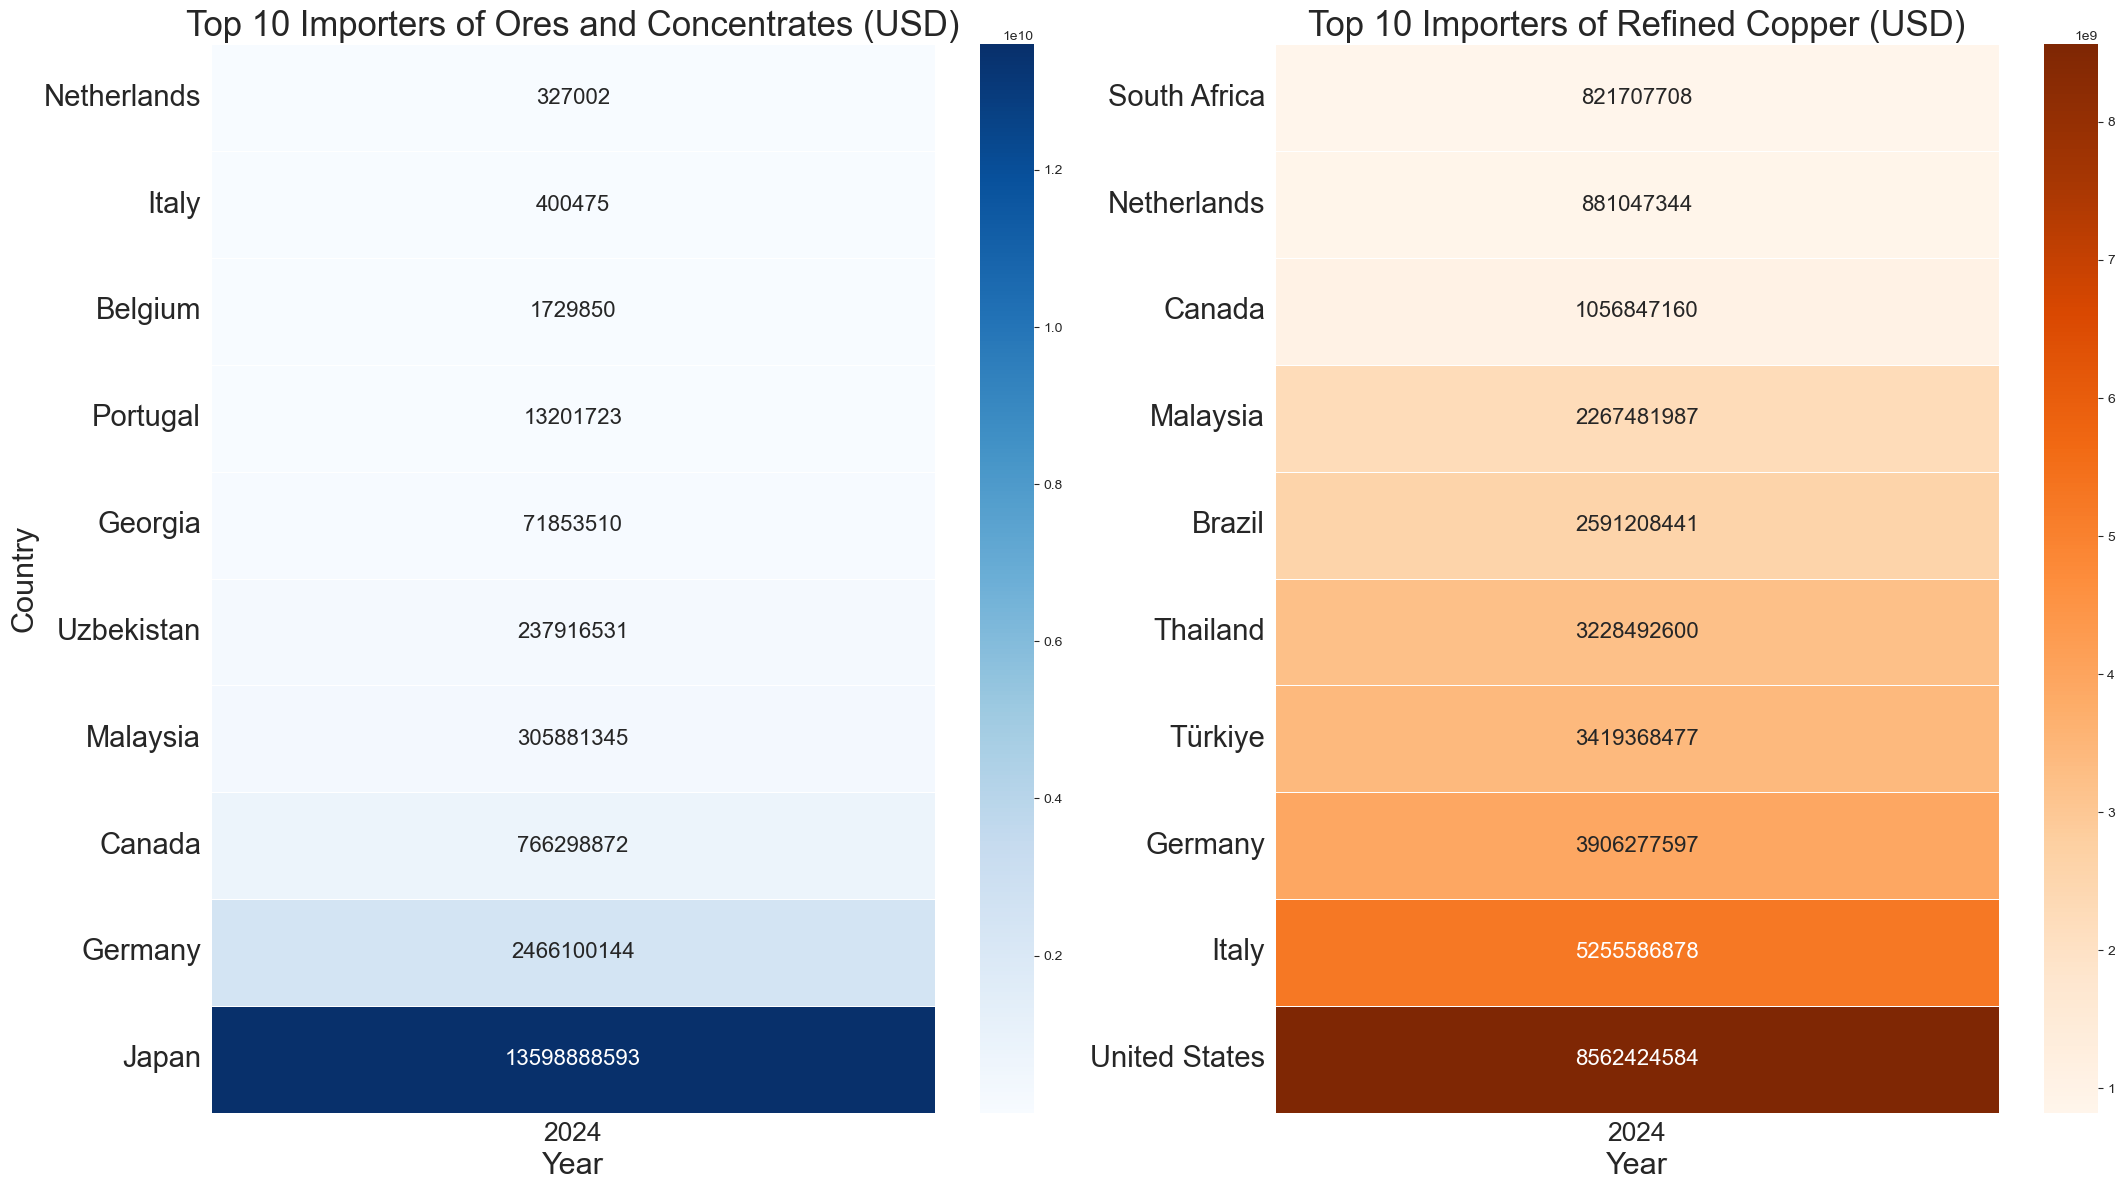

In [125]:
# Filter only Import data with CIF value
df_import = df_trade_cu_clean[
    (df_trade_cu_clean["trade_flow"] == "Import") & 
    (df_trade_cu_clean["value_type"] == "cif_value")
].copy()

# Separate data for 'Ores and Concentrates' and 'Refined Copper'
df_ores = df_import[df_import["commodity"] == "ores and concentrates"].copy()
df_refined = df_import[df_import["commodity"] == "refined copper"].copy()

# Get top 10 importing countries for each commodity (sorted by total import value)
top_ores_countries = df_ores.groupby("country")["trade_value"].sum().nlargest(10).index
top_refined_countries = df_refined.groupby("country")["trade_value"].sum().nlargest(10).index

# Filter data for only top 10 countries
df_ores_top = df_ores[df_ores["country"].isin(top_ores_countries)].copy()
df_refined_top = df_refined[df_refined["country"].isin(top_refined_countries)].copy()

# Sort by total import value (ensuring largest importer is at the top)
ores_sorted = df_ores_top.groupby("country")["trade_value"].sum().sort_values(ascending=False).index
refined_sorted = df_refined_top.groupby("country")["trade_value"].sum().sort_values(ascending=False).index

df_ores_top["country"] = pd.Categorical(df_ores_top["country"], categories=ores_sorted[::-1], ordered=True)
df_refined_top["country"] = pd.Categorical(df_refined_top["country"], categories=refined_sorted[::-1], ordered=True)

# Pivot for heatmap (ensuring correct order in the pivoted table)
df_ores_pivot = df_ores_top.pivot_table(index="country", columns="year", values="trade_value", aggfunc="sum").fillna(0)
df_ores_pivot = df_ores_pivot.loc[ores_sorted[::-1]]  # Sorting after pivot

df_refined_pivot = df_refined_top.pivot_table(index="country", columns="year", values="trade_value", aggfunc="sum").fillna(0)
df_refined_pivot = df_refined_pivot.loc[refined_sorted[::-1]]  # Sorting after pivot

# Set up the figure with increased height for better spacing
fig, axes = plt.subplots(1, 2, figsize=(22, 12))  

# Define optimized font sizes
title_font = int(32 * 0.8)  
label_font = int(28 * 0.8)  
tick_font = int(24 * 0.8)  
annot_font = int(20 * 0.8)  

# Heatmap for Ores and Concentrates Import (sorted)
sns.heatmap(df_ores_pivot, cmap="Blues", linewidths=0.5, annot=True, fmt=".0f", ax=axes[0], annot_kws={"size": annot_font})
axes[0].set_title("Top 10 Importers of Ores and Concentrates (USD)", fontsize=title_font)
axes[0].set_xlabel("Year", fontsize=label_font)
axes[0].set_ylabel("Country", fontsize=label_font)
axes[0].tick_params(axis='x', labelsize=tick_font)
axes[0].tick_params(axis='y', labelsize=tick_font + 2)
axes[0].set_yticklabels(axes[0].get_yticklabels(), rotation=0, ha="right")  

# Heatmap for Refined Copper Import (sorted)
sns.heatmap(df_refined_pivot, cmap="Oranges", linewidths=0.5, annot=True, fmt=".0f", ax=axes[1], annot_kws={"size": annot_font})
axes[1].set_title("Top 10 Importers of Refined Copper (USD)", fontsize=title_font)
axes[1].set_xlabel("Year", fontsize=label_font)
axes[1].set_ylabel("")  
axes[1].tick_params(axis='x', labelsize=tick_font)
axes[1].tick_params(axis='y', labelsize=tick_font + 2)
axes[1].set_yticklabels(axes[1].get_yticklabels(), rotation=0, ha="right")

plt.tight_layout()

# **Define full file path using predefined save_path**
file_name = "copper_trade_import_chart.png"
full_save_path = os.path.join(save_path, file_name)

# **Ensure the directory exists before saving**
os.makedirs(save_path, exist_ok=True)

# **Save the chart**
plt.savefig(full_save_path, dpi=300, bbox_inches="tight")

plt.show()